In [2]:
library(tidyverse)
library(ggrepel)
library(DescTools)
library(drc)
library(scales)
library(ggpubr)

print(sessionInfo())

R version 4.1.1 (2021-08-10)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 20.04.3 LTS

Matrix products: default
BLAS/LAPACK: /data/vihani/anaconda3/envs/jupyter/lib/libopenblasp-r0.3.17.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] ggpubr_0.4.0      scales_1.1.1      drc_3.0-1         MASS_7.3-54      
 [5] DescTools_0.99.43 ggrepel_0.9.1     forcats_0.5.1     stringr_1.4.0    
 [9] dplyr_1.0.7       purrr_0.3.4       readr_2.0.1       tidyr_1.1.3      
[13] tibble_3.1.4      ggplot2_3.3.5     tidyverse_1.3.1  

loaded via a 

In [3]:
carv_vitro <- read.delim("./luciferase_data/carv_vitro.csv", header=T, sep=',', row.names = 1)
ment_vitro <- read.delim("./luciferase_data/ment_vitro.csv", header=T, sep=',', row.names = 1)
octa_vitro <- read.delim("./luciferase_data/octa_vitro.csv", header=T, sep=',', row.names = 1)

In [4]:
pcarv_vivo <- read.delim("./olfr_de/pS6_DE_1p_pCarvone.csv", header=T, sep=',', row.names=1)
ncarv_vivo <- read.delim("./olfr_de/pS6_DE_1p_nCarvone.csv", header=T, sep=',', row.names=1)
pment_vivo <- read.delim("./olfr_de/pS6_DE_1M_pMenthol.csv", header=T, sep=',', row.names=1)
nment_vivo <- read.delim("./olfr_de/pS6_DE_1M_nMenthol.csv", header=T, sep=',', row.names=1)
pocta_vivo <- read.delim("./olfr_de/pS6_DE_10p_p2octanol.csv", header=T, sep=',', row.names=1)
nocta_vivo <- read.delim("./olfr_de/pS6_DE_10p_n2octanol.csv", header=T, sep=',', row.names=1)

pcarv_vivo_res <- pcarv_vivo %>%
    subset(logFC > 0 & FDR < 0.05) %>%
    pull(symbol)

ncarv_vivo_res <- ncarv_vivo %>%
    subset(logFC > 0 & FDR < 0.05) %>%
    pull(symbol)

pment_vivo_res <- pment_vivo %>%
    subset(logFC > 0 & FDR < 0.05) %>%
    pull(symbol)

nment_vivo_res <- nment_vivo %>%
    subset(logFC > 0 & FDR < 0.05) %>%
    pull(symbol)

pocta_vivo_res <- pocta_vivo %>%
    subset(logFC > 0 & FDR < 0.05) %>%
    pull(symbol)

nocta_vivo_res <- nocta_vivo %>%
    subset(logFC > 0 & FDR < 0.05) %>%
    pull(symbol) 

pcarv_vivo$response <- "none"
pcarv_vivo[which(pcarv_vivo$symbol %in% pcarv_vivo_res),"response"] <- "pCarvone"
pcarv_vivo[which(pcarv_vivo$symbol %in% ncarv_vivo_res),"response"] <- "nCarvone"
pcarv_vivo[which(pcarv_vivo$symbol %in% intersect(pcarv_vivo_res,ncarv_vivo_res)),"response"] <- "both"
pcarv_vivo$response <- factor(pcarv_vivo$response)

ncarv_vivo$response <- "none"
ncarv_vivo[which(ncarv_vivo$symbol %in% pcarv_vivo_res),"response"] <- "pCarvone"
ncarv_vivo[which(ncarv_vivo$symbol %in% ncarv_vivo_res),"response"] <- "nCarvone"
ncarv_vivo[which(ncarv_vivo$symbol %in% intersect(pcarv_vivo_res,ncarv_vivo_res)),"response"] <- "both"
ncarv_vivo$response <- factor(ncarv_vivo$response)

pment_vivo$response <- "none"
pment_vivo[which(pment_vivo$symbol %in% pment_vivo_res),"response"] <- "pMenthol"
pment_vivo[which(pment_vivo$symbol %in% nment_vivo_res),"response"] <- "nMenthol"
pment_vivo[which(pment_vivo$symbol %in% intersect(pment_vivo_res,nment_vivo_res)),"response"] <- "both"
pment_vivo$response <- factor(pment_vivo$response)

nment_vivo$response <- "none"
nment_vivo[which(nment_vivo$symbol %in% pment_vivo_res),"response"] <- "pMenthol"
nment_vivo[which(nment_vivo$symbol %in% nment_vivo_res),"response"] <- "nMenthol"
nment_vivo[which(nment_vivo$symbol %in% intersect(pment_vivo_res,nment_vivo_res)),"response"] <- "both"
nment_vivo$response <- factor(nment_vivo$response)

pocta_vivo$response <- "none"
pocta_vivo[which(pocta_vivo$symbol %in% pocta_vivo_res),"response"] <- "p2Octanol"
pocta_vivo[which(pocta_vivo$symbol %in% nocta_vivo_res),"response"] <- "n2Octanol"
pocta_vivo[which(pocta_vivo$symbol %in% intersect(pocta_vivo_res,nocta_vivo_res)),"response"] <- "both"
pocta_vivo$response <- factor(pocta_vivo$response)

nocta_vivo$response <- "none"
nocta_vivo[which(nocta_vivo$symbol %in% pocta_vivo_res),"response"] <- "p2Octanol"
nocta_vivo[which(nocta_vivo$symbol %in% nocta_vivo_res),"response"] <- "n2Octanol"
nocta_vivo[which(nocta_vivo$symbol %in% intersect(pocta_vivo_res,nocta_vivo_res)),"response"] <- "both"
nocta_vivo$response <- factor(nocta_vivo$response)

In [5]:
#carv_aov <- carv_vitro %>%
#    group_by(tested_OR, specific_odorant) %>%
#    do(as.data.frame(DunnettTest(x = .$normLuc_val, g=.$specific_conc, control ="0")[[1]]) %>% rownames_to_column(var="comparison"))
#ment_aov <- ment_vitro %>%
#    group_by(tested_OR, specific_odorant) %>%
#    do(as.data.frame(DunnettTest(x = .$normLuc_val, g=.$specific_conc, control ="0")[[1]]) %>% rownames_to_column(var="comparison"))
#octa_aov <- octa_vitro %>%
#    group_by(tested_OR, specific_odorant) %>%
#    do(as.data.frame(DunnettTest(x = .$normLuc_val, g=.$specific_conc, control ="0")[[1]]) %>% rownames_to_column(var="comparison"))
#write.csv(carv_aov, "./luciferase_data/carv_aov.csv")
#write.csv(ment_aov, "./luciferase_data/ment_aov.csv")
#write.csv(octa_aov, "./luciferase_data/octa_aov.csv")
carv_aov <- read.delim("./luciferase_data/carv_aov.csv", header=T, sep=',', row.names = 1)
ment_aov <- read.delim("./luciferase_data/ment_aov.csv", header=T, sep=',', row.names = 1)
octa_aov <- read.delim("./luciferase_data/octa_aov.csv", header=T, sep=',', row.names = 1)

In [8]:
carv_aov <- carv_aov %>%
    subset(specific_odorant == "plusH" | specific_odorant == "minusD") %>%
    subset(pval < 0.05) %>%
    group_by(tested_OR, specific_odorant) %>%
    filter(n() > 1) %>%
    pull(tested_OR) %>%
    unique()

ment_aov <- ment_aov %>%
    subset(specific_odorant == "plusH" | specific_odorant == "minusD") %>%
    subset(pval < 0.05) %>%
    group_by(tested_OR, specific_odorant) %>%
    filter(n() > 1) %>%
    pull(tested_OR) %>%
    unique()

octa_aov <- octa_aov %>%
    subset(specific_odorant == "plusH" | specific_odorant == "minusD") %>%
    subset(pval < 0.05) %>%
    group_by(tested_OR, specific_odorant) %>%
    filter(n() > 1) %>%
    pull(tested_OR) %>%
    unique()

In [9]:
carv_aov2 <- carv_vitro %>%
    group_by(tested_OR, specific_odorant) %>%
    do(data.frame(summary(aov(normLuc_val ~ specific_conc, .))[[1]][["Pr(>F)"]][1])) 
colnames(carv_aov2)[3] <- "pval"
carv_aov2 <- carv_aov2 %>%
    group_by(tested_OR) %>%
    subset(specific_odorant == "plusH" | specific_odorant == "minusD") %>%
    subset(pval < 0.05) %>%
    pull(tested_OR) %>%
    unique()
    
ment_aov2 <- ment_vitro %>%
    group_by(tested_OR, specific_odorant) %>%
    do(data.frame(summary(aov(normLuc_val ~ specific_conc, .))[[1]][["Pr(>F)"]][1])) 
colnames(ment_aov2)[3] <- "pval"
ment_aov2 <- ment_aov2 %>%
    group_by(tested_OR) %>%
    subset(specific_odorant == "plusH" | specific_odorant == "minusD") %>%
    subset(pval < 0.05) %>%
    pull(tested_OR) %>%
    unique()

octa_aov2 <- octa_vitro %>%
    group_by(tested_OR, specific_odorant) %>%
    do(data.frame(summary(aov(normLuc_val ~ specific_conc, .))[[1]][["Pr(>F)"]][1])) 
colnames(octa_aov2)[3] <- "pval"
octa_aov2 <- octa_aov2 %>%
    group_by(tested_OR) %>%
    subset(specific_odorant == "plusH" | specific_odorant == "minusD") %>%
    subset(pval < 0.05) %>%
    pull(tested_OR) %>%
    unique()

In [10]:
carv_vitro_res <- subset(carv_vitro, tested_OR %in% carv_aov)
ment_vitro_res <- subset(ment_vitro, tested_OR %in% ment_aov)
octa_vitro_res <- subset(octa_vitro, tested_OR %in% octa_aov)

carv_vitro_res <- subset(carv_vitro_res, tested_OR %in% carv_aov2)
ment_vitro_res <- subset(ment_vitro_res, tested_OR %in% ment_aov2)
octa_vitro_res <- subset(octa_vitro_res, tested_OR %in% octa_aov2)

carv_vitro_res <- subset(carv_vitro_res, specific_odorant == "plusH" | specific_odorant == "minusD")
ment_vitro_res <- subset(ment_vitro_res, specific_odorant == "plusH" | specific_odorant == "minusD")
octa_vitro_res <- subset(octa_vitro_res, specific_odorant == "plusH" | specific_odorant == "minusD")

vitro_res <- rbind.data.frame(carv_vitro_res, ment_vitro_res, octa_vitro_res)
vitro_res$unique <- paste(vitro_res$odor_set, vitro_res$tested_OR, sep="_")
vitro_res_ls <- split(vitro_res, f = as.factor(vitro_res$unique))

In [11]:
carv_legend_data <- vitro_res_ls$Carvone_Olfr1047
carv_legend_data$specific_odorant <- factor(carv_legend_data$specific_odorant, levels = c("plusH","minusD"))
carv_legend <- ggplot(data = carv_legend_data, aes(x = specific_conc, y = normLuc_val, color = specific_odorant)) +
    geom_point(alpha = 0.5, stroke = 0) +
    scale_x_continuous(trans = pseudo_log_trans(sigma = 1, base = 10),breaks = c(0,1,10,100,1000)) +
    scale_color_manual(name = NULL,
                       values = c("minusD"="blue","plusH"="red"),
                       labels = c("plusH"="(+)-Carvone","minusD"="(-)-Carvone")) +
    theme(legend.key=element_blank(),
          legend.key.size = unit(1.25, 'cm'),
          legend.text = element_text(size=18)) +
    guides(colour = guide_legend(override.aes = list(size=6)))

carv_legend <- as_ggplot(get_legend(carv_legend))

menth_legend_data <- vitro_res_ls$Menthol_Olfr1085
menth_legend_data$specific_odorant <- factor(menth_legend_data$specific_odorant, levels = c("plusH","minusD"))
menth_legend <- ggplot(data = menth_legend_data, aes(x = specific_conc, y = normLuc_val, color = specific_odorant)) +
    geom_point(alpha = 0.5, stroke = 0) +
    scale_x_continuous(trans = pseudo_log_trans(sigma = 1, base = 10),breaks = c(0,1,10,100,1000)) +
    scale_color_manual(name = NULL,
                       values = c("minusD"="blue","plusH"="red"),
                       labels = c("plusH"="(+)-Menthol","minusD"="(-)-Menthol")) +
    theme(legend.key=element_blank(),
          legend.key.size = unit(1.25, 'cm'),
          legend.text = element_text(size=18)) +
    guides(colour = guide_legend(override.aes = list(size=6)))

menth_legend <- as_ggplot(get_legend(menth_legend))

octa_legend_data <- vitro_res_ls$`2Octanol_Olfr1009`
octa_legend_data$specific_odorant <- factor(octa_legend_data$specific_odorant, levels = c("plusH","minusD"))
octa_legend <- ggplot(data = octa_legend_data, aes(x = specific_conc, y = normLuc_val, color = specific_odorant)) +
    geom_point(alpha = 0.5, stroke = 0) +
    scale_x_continuous(trans = pseudo_log_trans(sigma = 1, base = 10),breaks = c(0,1,10,100,1000)) +
    scale_color_manual(name = NULL,
                       values = c("minusD"="blue","plusH"="red"),
                       labels = c("plusH"="(+)-2-Octanol","minusD"="(-)-2-Octanol")) +
    theme(legend.key=element_blank(),
          legend.key.size = unit(1.25, 'cm'),
          legend.text = element_text(size=18)) +
    guides(colour = guide_legend(override.aes = list(size=6)))

octa_legend <- as_ggplot(get_legend(octa_legend))


In [12]:
for (num in seq(1,length(vitro_res_ls),1)) {
    df <- vitro_res_ls[[num]]
    odor <- unique(df$odor_set)
    receptor <- unique(df$tested_OR)
    min_conc <- min(df$specific_conc)
    max_conc <- max(df$specific_conc)
    plusH_data <- subset(df, specific_odorant == "plusH")
    minusD_data <- subset(df, specific_odorant == "minusD")
    plusH_data_noZero <- subset(plusH_data, specific_conc != 0)
    minusD_data_noZero <- subset(minusD_data, specific_conc != 0)
    plusH_zero <- subset(plusH_data, specific_conc == 0)
    minusD_zero <- subset(minusD_data, specific_conc == 0)
    zero_data_plusH <- rbind.data.frame(plusH_zero,minusD_zero)
    zero_data_minusD <- rbind.data.frame(plusH_zero,minusD_zero)
    zero_data_plusH$specific_odorant <- "plusH"
    zero_data_minusD$specific_odorant <- "minusD"
    plusH_data <- rbind.data.frame(plusH_data_noZero, zero_data_plusH)
    minusD_data <- rbind.data.frame(minusD_data_noZero, zero_data_minusD)
    plusH_model <- drm(formula = normLuc_val ~ specific_conc, data = plusH_data, fct = LL.4())
    minusD_model <- drm(formula = normLuc_val ~ specific_conc, data = minusD_data, fct = LL.4())
    plusH_pred_df <- data.frame(conc = seq(min_conc, max_conc, length = 5000))
    minusD_pred_df <- data.frame(conc = seq(min_conc, max_conc, length = 5000))
    plusH_pred <- data.frame(plusH_pred = predict(plusH_model, newdata = plusH_pred_df))
    minusD_pred <- data.frame(minusD_pred = predict(minusD_model, newdata = minusD_pred_df))
    df_plotting_1 <- rbind.data.frame(plusH_data, minusD_data)
    df_plotting_2 <- cbind.data.frame(plusH_pred_df, plusH_pred)
    df_plotting_3 <- cbind.data.frame(minusD_pred_df, minusD_pred)
    assign(paste0("plot_",odor,"_",receptor),
        ggplot(data = subset(df_plotting_1, specific_conc != 0), aes(x = specific_conc, y = normLuc_val, color = specific_odorant)) +
        geom_point(alpha = 0.5, stroke = 0, size = 4)+
        geom_point(data = subset(df_plotting_1, specific_conc == 0 & specific_odorant == "plusH"), size = 4, color = "black", stroke = 0, alpha = 0.5) +
        geom_line(data = df_plotting_2, aes(x = conc, y = plusH_pred), color = "red") +
        geom_line(data = df_plotting_3, aes(x = conc, y = minusD_pred), color = "blue") +
        scale_color_manual(values = c("blue","red")) +
        ggtitle(receptor) +
        scale_x_continuous(trans = pseudo_log_trans(sigma = 1, base = 10),breaks = c(0,1,10,100,1000)) +
        ylim(0, NA) +
        theme(legend.position = "none",
              plot.title = element_text(size = 16, hjust = 0.5),
              panel.grid.major = element_blank(),
              panel.grid.minor = element_blank(),
              panel.background = element_blank(),
              axis.text.x = element_text(size=10, color = "black"),
              axis.text.y = element_text(size=10, color = "black"),
              axis.ticks.y = element_blank(),
              axis.ticks.x = element_blank(),
              axis.title.x = element_blank(),
              axis.title.y = element_blank(),
              axis.line.x = element_line(),
              axis.line.y = element_line()))
}
     


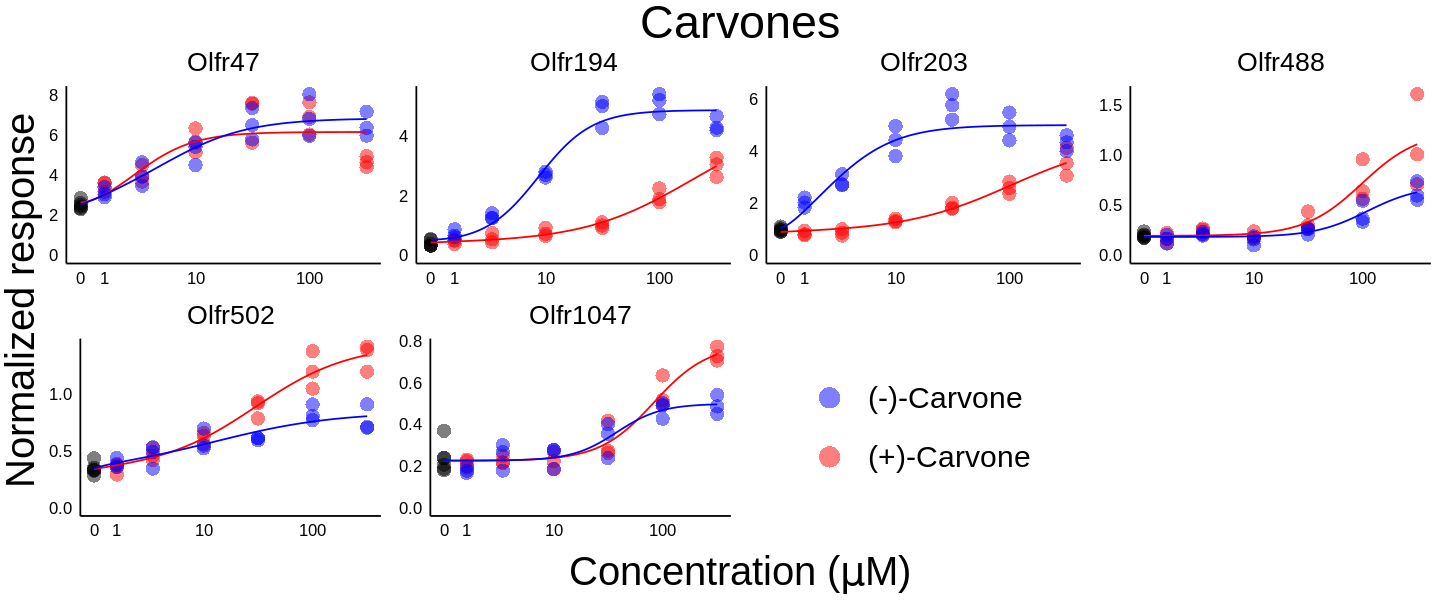

In [13]:
carvones_drc_plot <- ggarrange(plot_Carvone_Olfr47, plot_Carvone_Olfr194, plot_Carvone_Olfr203,
                               plot_Carvone_Olfr488, plot_Carvone_Olfr502,
                               plot_Carvone_Olfr1047,
                               carv_legend, ncol = 4, nrow = 2)
carvones_drc_plot <- annotate_figure(carvones_drc_plot,
                                     top = text_grob("Carvones", color = "black", size = 28),
                                     bottom = text_grob(bquote(paste("Concentration (", mu, "M)")), color = "black", size = 24),
                                     left = text_grob("Normalized response", color = "black", rot = 90, size = 24))


options(repr.plot.width=12, repr.plot.height=5)
carvones_drc_plot
#ggsave("./plots/fig_1_supp2b.pdf", carvones_drc_plot, height = 5, width = 12)

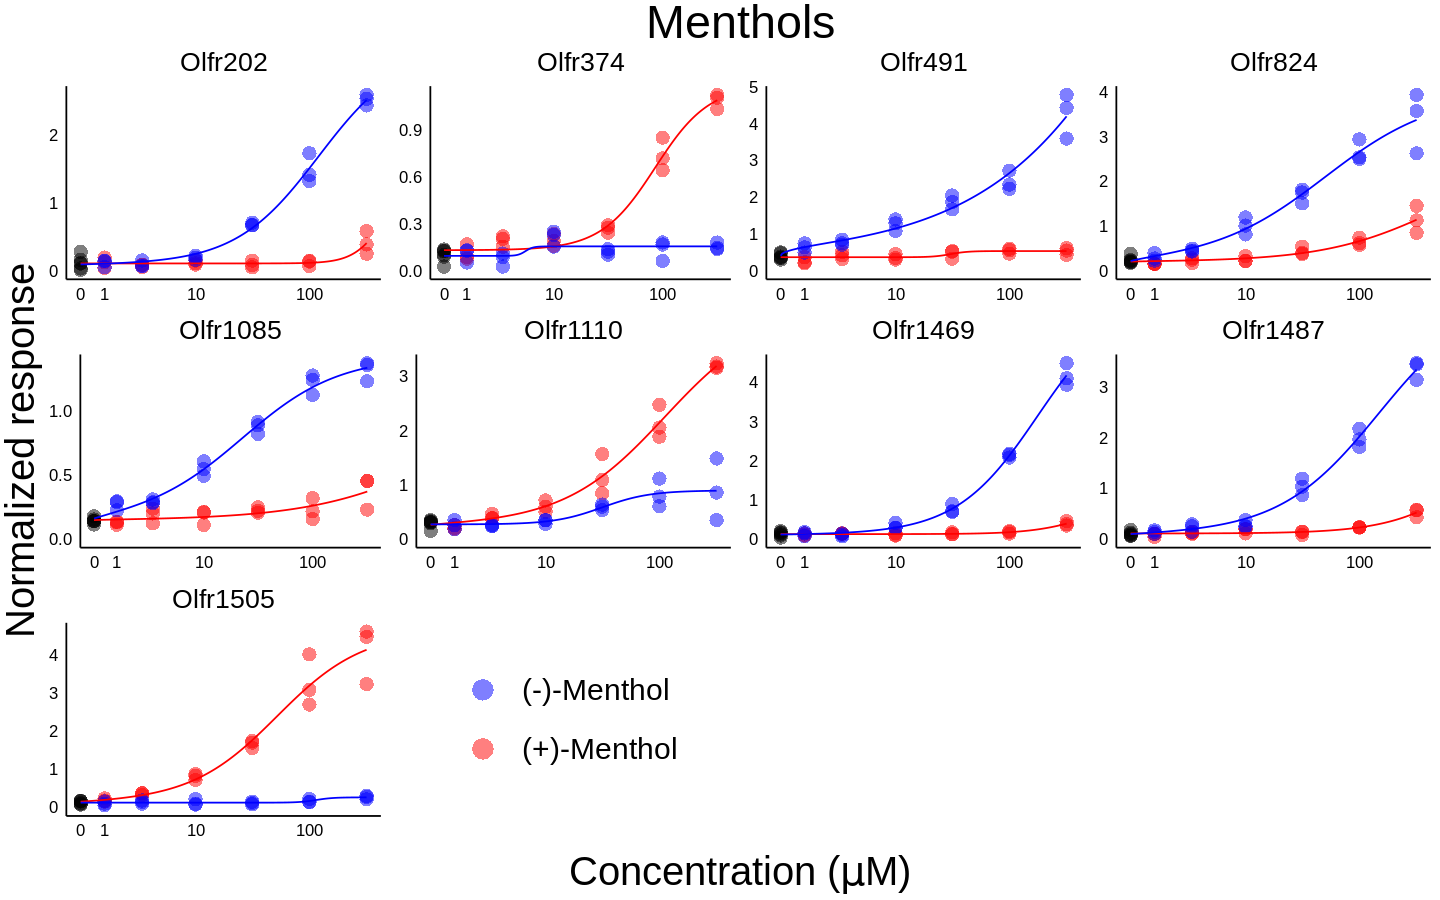

In [14]:
menthols_drc_plot <- ggarrange(plot_Menthol_Olfr202, plot_Menthol_Olfr374, plot_Menthol_Olfr491,
                               plot_Menthol_Olfr824, 
                               plot_Menthol_Olfr1085, plot_Menthol_Olfr1110, plot_Menthol_Olfr1469, plot_Menthol_Olfr1487,
                               plot_Menthol_Olfr1505, menth_legend, ncol = 4, nrow = 3)
menthols_drc_plot <- annotate_figure(menthols_drc_plot,
                                     top = text_grob("Menthols", color = "black", size = 28),
                                     bottom = text_grob(bquote(paste("Concentration (", mu, "M)")), color = "black", size = 24),
                                     left = text_grob("Normalized response", color = "black", rot = 90, size = 24))

options(repr.plot.width=12, repr.plot.height=7.5)
menthols_drc_plot
#ggsave("./plots/fig_1_supp2d.pdf", menthols_drc_plot, height = 7.5, width = 12)

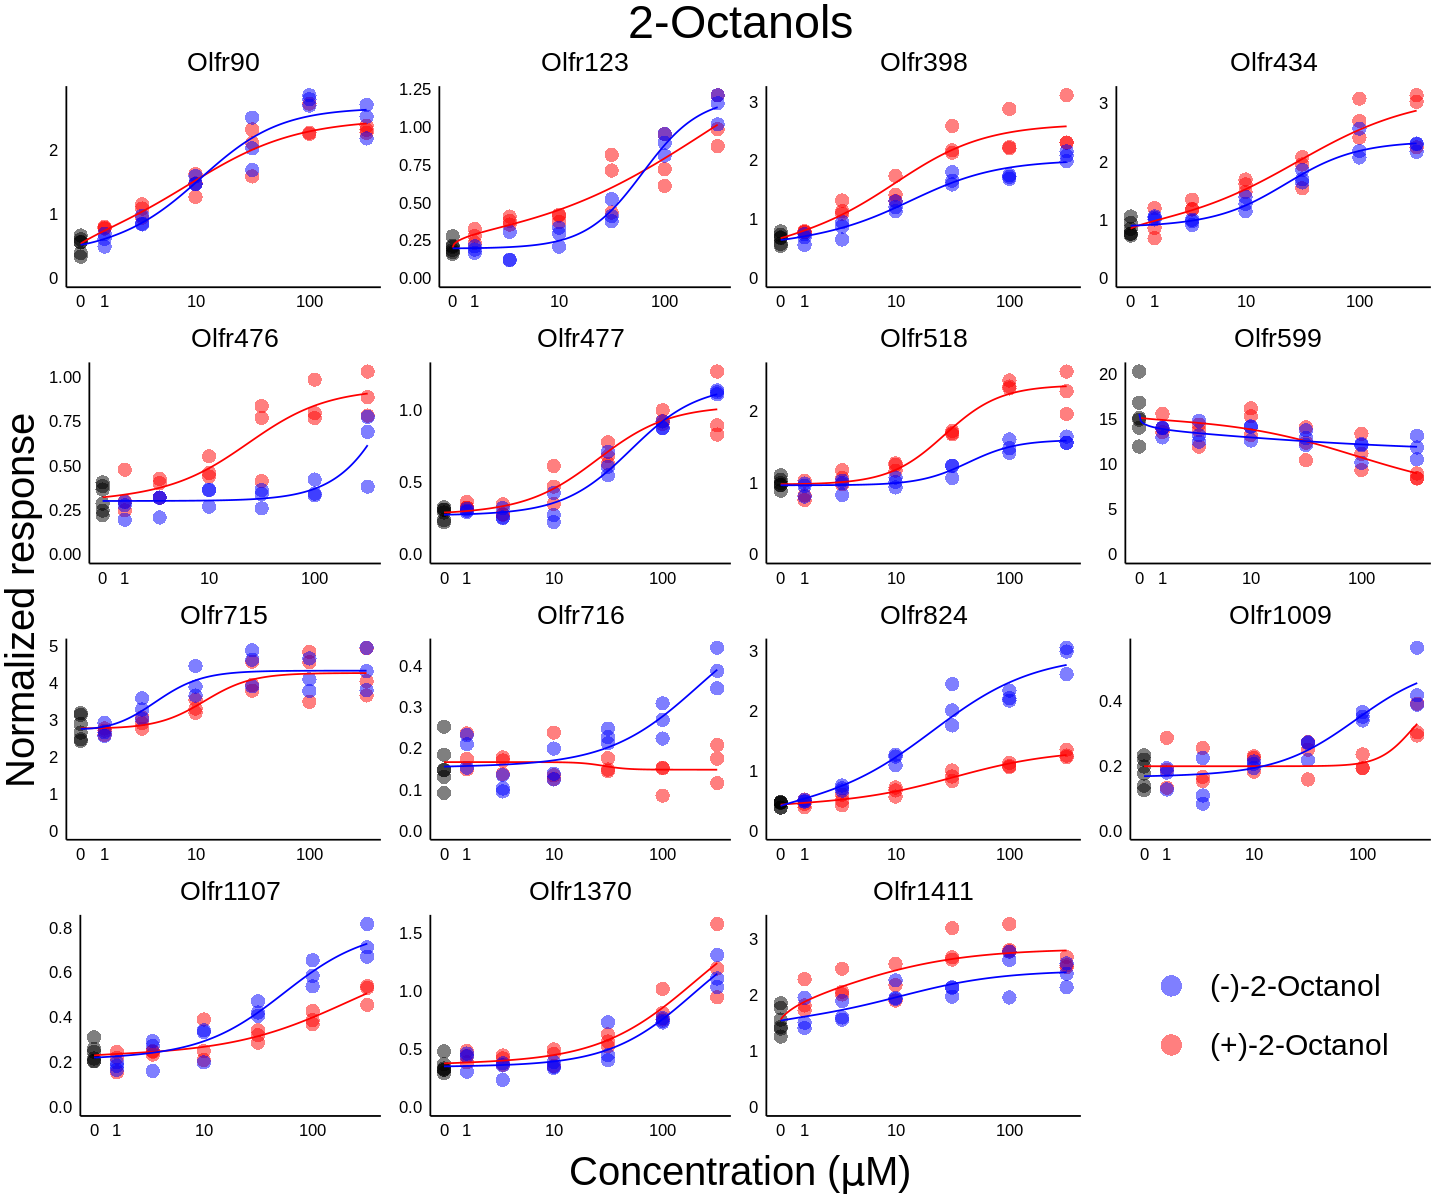

In [15]:
octan2ol_drc_plot <- ggarrange(plot_2Octanol_Olfr90,
                               plot_2Octanol_Olfr123,
                               plot_2Octanol_Olfr398,
                               plot_2Octanol_Olfr434,
                               plot_2Octanol_Olfr476,
                               plot_2Octanol_Olfr477,
                               plot_2Octanol_Olfr518,
                               plot_2Octanol_Olfr599,
                               plot_2Octanol_Olfr715,
                               plot_2Octanol_Olfr716,
                               plot_2Octanol_Olfr824,
                               plot_2Octanol_Olfr1009,
                               plot_2Octanol_Olfr1107,
                               plot_2Octanol_Olfr1370,
                               plot_2Octanol_Olfr1411,
                               octa_legend, ncol = 4 , nrow = 4)

octan2ol_drc_plot <- annotate_figure(octan2ol_drc_plot,
                                     top = text_grob("2-Octanols", color = "black", size = 28),
                                     bottom = text_grob(bquote(paste("Concentration (", mu, "M)")), color = "black", size = 24),
                                     left = text_grob("Normalized response", color = "black", rot = 90, size = 24))

options(repr.plot.width=12, repr.plot.height=10)
octan2ol_drc_plot
#ggsave("./plots/fig_1_supp2f.pdf", octan2ol_drc_plot, height = 10, width = 12)

In [16]:
all_vitro <- rbind.data.frame(carv_vitro, ment_vitro, octa_vitro)
all_vitro$unique <- paste(all_vitro$odor_set, all_vitro$tested_OR, sep="_")
all_vitro_ls <- split(all_vitro, f = as.factor(all_vitro$unique))

In [17]:
for (num in seq(1, length(all_vitro_ls),1)){
    df <- all_vitro_ls[[num]]
    odor <- unique(df$odor_set)
    receptor <- unique(df$tested_OR)
    assign(paste0("plus_plot_",odor,"_",receptor),
           ggplot(data = subset(df, specific_odorant == "plusH"), aes(x = specific_conc, y = normLuc_val))+
            geom_point(data = subset(df, specific_odorant == "minusD"), alpha = 0, size = 4, stroke = 0, color = "white") +
            geom_point(data = subset(df, specific_odorant == "pCI_plusH"), alpha = 0, size = 4, stroke = 0, color = "white") +
            geom_point(data = subset(df, specific_odorant == "pCI_minusD"), alpha = 0, size = 4, stroke = 0, color = "white") +
            geom_point(color = "#F8766D", size = 4, stroke = 0, alpha = 0.5) +
            ggtitle(receptor) +
            scale_x_continuous(trans = pseudo_log_trans(sigma = 1, base = 10),breaks = c(0,1,10,100,1000)) +
            ylim(0, NA) +
            theme(legend.position = "none",
                  plot.title = element_text(size = 16, hjust = 0.5),
                  panel.grid.major = element_blank(),
                  panel.grid.minor = element_blank(),
                  panel.background = element_blank(),
                  axis.text.x = element_text(size=10, color = "black"),
                  axis.text.y = element_text(size=10, color = "black"),
                  axis.ticks.y = element_blank(),
                  axis.ticks.x = element_blank(),
                  axis.title.x = element_blank(),
                  axis.title.y = element_blank(),
                  axis.line.x = element_line(),
                  axis.line.y = element_line()))
    assign(paste0("minus_plot_",odor,"_",receptor),
           ggplot(data = subset(df, specific_odorant == "minusD"), aes(x = specific_conc, y = normLuc_val))+
            geom_point(data = subset(df, specific_odorant == "plusH"), size = 4, stroke = 0, alpha = 0, color = "white") +
            geom_point(data = subset(df, specific_odorant == "pCI_plusH"), size = 4, stroke = 0, alpha = 0, color = "white") +
            geom_point(data = subset(df, specific_odorant == "pCI_minusD"), size = 4, stroke = 0, alpha = 0, color = "white") +
            geom_point(color = "#00BFC4", size = 4, stroke = 0, alpha = 0.5) +
            ggtitle(receptor) +
            scale_x_continuous(trans = pseudo_log_trans(sigma = 1, base = 10),breaks = c(0,1,10,100,1000)) +
            ylim(0, NA) +
            theme(legend.position = "none",
                  plot.title = element_text(size = 16, hjust = 0.5),
                  panel.grid.major = element_blank(),
                  panel.grid.minor = element_blank(),
                  panel.background = element_blank(),
                  axis.text.x = element_text(size=10, color = "black"),
                  axis.text.y = element_text(size=10, color = "black"),
                  axis.ticks.y = element_blank(),
                  axis.ticks.x = element_blank(),
                  axis.title.x = element_blank(),
                  axis.title.y = element_blank(),
                  axis.line.x = element_line(),
                  axis.line.y = element_line()))
    assign(paste0("pCI_plus_plot_",odor,"_",receptor),
           ggplot(data = subset(df, specific_odorant == "pCI_plusH"), aes(x = specific_conc, y = normLuc_val))+
            geom_point(data = subset(df, specific_odorant == "minusD"), size = 4, stroke = 0, alpha = 0, color = "white") +
            geom_point(data = subset(df, specific_odorant == "plusH"), size = 4, stroke = 0, alpha = 0, color = "white") +
            geom_point(data = subset(df, specific_odorant == "pCI_minusD"), size = 4, stroke = 0, alpha = 0, color = "white") +
            geom_point(color = "#7CAE00", size = 4, stroke = 0, alpha = 0.5) +
            ggtitle("pCI") +
            scale_x_continuous(trans = pseudo_log_trans(sigma = 1, base = 10),breaks = c(0,1,10,100,1000)) +
            ylim(0, NA) +
            theme(legend.position = "none",
                  plot.title = element_text(size = 16, hjust = 0.5),
                  panel.grid.major = element_blank(),
                  panel.grid.minor = element_blank(),
                  panel.background = element_blank(),
                  axis.text.x = element_text(size=10, color = "black"),
                  axis.text.y = element_text(size=10, color = "black"),
                  axis.ticks.y = element_blank(),
                  axis.ticks.x = element_blank(),
                  axis.title.x = element_blank(),
                  axis.title.y = element_blank(),
                  axis.line.x = element_line(),
                  axis.line.y = element_line()))
    assign(paste0("pCI_minus_plot_",odor,"_",receptor),
           ggplot(data = subset(df, specific_odorant == "pCI_minusD"), aes(x = specific_conc, y = normLuc_val))+
            geom_point(data = subset(df, specific_odorant == "plusH"), size = 4, stroke = 0, alpha = 0, color = "white") +
            geom_point(data = subset(df, specific_odorant == "pCI_plusH"), size = 4, stroke = 0, alpha = 0, color = "white") +
            geom_point(data = subset(df, specific_odorant == "minusD"), size = 4, stroke = 0, alpha = 0, color = "white") +
            geom_point(color = "#C77CFF", size = 4, stroke = 0, alpha = 0.5) +
            ggtitle("pCI") +
            scale_x_continuous(trans = pseudo_log_trans(sigma = 1, base = 10),breaks = c(0,1,10,100,1000)) +
            ylim(0, NA) +
            theme(legend.position = "none",
                  plot.title = element_text(size = 16, hjust = 0.5),
                  panel.grid.major = element_blank(),
                  panel.grid.minor = element_blank(),
                  panel.background = element_blank(),
                  axis.text.x = element_text(size=10, color = "black"),
                  axis.text.y = element_text(size=10, color = "black"),
                  axis.ticks.y = element_blank(),
                  axis.ticks.x = element_blank(),
                  axis.title.x = element_blank(),
                  axis.title.y = element_blank(),
                  axis.line.x = element_line(),
                  axis.line.y = element_line()))
}

In [18]:
all_2oct_legend_data <- all_vitro_ls$`2Octanol_Olfr1009`
all_2oct_legend_data$specific_odorant <- factor(all_2oct_legend_data$specific_odorant, levels = c("plusH","minusD","pCI_plusH","pCI_minusD"))

all_carv_legend_data <- all_vitro_ls$Carvone_Olfr1047
all_carv_legend_data$specific_odorant <- factor(all_carv_legend_data$specific_odorant, levels = c("plusH","minusD","pCI_plusH","pCI_minusD"))

all_ment_legend_data <- all_vitro_ls$Menthol_Olfr1085
all_ment_legend_data$specific_odorant <- factor(all_ment_legend_data$specific_odorant, levels = c("plusH","minusD","pCI_plusH","pCI_minusD"))


In [19]:
plusH_2oct_legend <- ggplot(data = subset(all_2oct_legend_data, specific_odorant == "plusH"), aes(x = specific_conc, y = normLuc_val, color = specific_odorant))+
    geom_point(alpha = 0.5, stroke = 0) +
    scale_x_continuous(trans = pseudo_log_trans(sigma = 1, base = 10),breaks = c(0,1,10,100,1000)) +
    scale_color_manual(name = NULL,
                       values = c("plusH"="#F8766D"),
                       labels = c("plusH"="(+)-2-Octanol")) +
    theme(legend.key=element_blank(),
          legend.key.size = unit(1.25, 'cm'),
          legend.text = element_text(size=18)) +
    guides(colour = guide_legend(override.aes = list(size=6)))
plusH_2oct_legend <- as_ggplot(get_legend(plusH_2oct_legend))

minusD_2oct_legend <- ggplot(data = subset(all_2oct_legend_data, specific_odorant == "minusD"), aes(x = specific_conc, y = normLuc_val, color = specific_odorant))+
    geom_point(alpha = 0.5, stroke = 0) +
    scale_x_continuous(trans = pseudo_log_trans(sigma = 1, base = 10),breaks = c(0,1,10,100,1000)) +
    scale_color_manual(name = NULL,
                       values = c("minusD"="#00BFC4"),
                       labels = c("minusD"="(-)-2-Octanol")) +
    theme(legend.key=element_blank(),
          legend.key.size = unit(1.25, 'cm'),
          legend.text = element_text(size=18)) +
    guides(colour = guide_legend(override.aes = list(size=6)))
minusD_2oct_legend <- as_ggplot(get_legend(minusD_2oct_legend))

pCI_plusH_2oct_legend <- ggplot(data = subset(all_2oct_legend_data, specific_odorant == "pCI_plusH"), aes(x = specific_conc, y = normLuc_val, color = specific_odorant))+
    geom_point(alpha = 0.5, stroke = 0) +
    scale_x_continuous(trans = pseudo_log_trans(sigma = 1, base = 10),breaks = c(0,1,10,100,1000)) +
    scale_color_manual(name = NULL,
                       values = c("pCI_plusH"="#7CAE00"),
                       labels = c("pCI_plusH"="(+)-2-Octanol")) +
    theme(legend.key=element_blank(),
          legend.key.size = unit(1.25, 'cm'),
          legend.text = element_text(size=18)) +
    guides(colour = guide_legend(override.aes = list(size=6)))
pCI_plusH_2oct_legend <- as_ggplot(get_legend(pCI_plusH_2oct_legend))

pCI_minusD_2oct_legend <- ggplot(data = subset(all_2oct_legend_data, specific_odorant == "pCI_minusD"), aes(x = specific_conc, y = normLuc_val, color = specific_odorant))+
    geom_point(alpha = 0.5, stroke = 0) +
    scale_x_continuous(trans = pseudo_log_trans(sigma = 1, base = 10),breaks = c(0,1,10,100,1000)) +
    scale_color_manual(name = NULL,
                       values = c("pCI_minusD"="#C77CFF"),
                       labels = c("pCI_minusD"="(-)-2-Octanol")) +
    theme(legend.key=element_blank(),
          legend.key.size = unit(1.25, 'cm'),
          legend.text = element_text(size=18)) +
    guides(colour = guide_legend(override.aes = list(size=6)))
pCI_minusD_2oct_legend <- as_ggplot(get_legend(pCI_minusD_2oct_legend))


In [20]:
plusH_carv_legend <- ggplot(data = subset(all_carv_legend_data, specific_odorant == "plusH"), aes(x = specific_conc, y = normLuc_val, color = specific_odorant))+
    geom_point(alpha = 0.5, stroke = 0) +
    scale_x_continuous(trans = pseudo_log_trans(sigma = 1, base = 10),breaks = c(0,1,10,100,1000)) +
    scale_color_manual(name = NULL,
                       values = c("plusH"="#F8766D"),
                       labels = c("plusH"="(+)-Carvone")) +
    theme(legend.key=element_blank(),
          legend.key.size = unit(1.25, 'cm'),
          legend.text = element_text(size=18)) +
    guides(colour = guide_legend(override.aes = list(size=6)))
plusH_carv_legend <- as_ggplot(get_legend(plusH_carv_legend))

minusD_carv_legend <- ggplot(data = subset(all_carv_legend_data, specific_odorant == "minusD"), aes(x = specific_conc, y = normLuc_val, color = specific_odorant))+
    geom_point(alpha = 0.5, stroke = 0) +
    scale_x_continuous(trans = pseudo_log_trans(sigma = 1, base = 10),breaks = c(0,1,10,100,1000)) +
    scale_color_manual(name = NULL,
                       values = c("minusD"="#00BFC4"),
                       labels = c("minusD"="(-)-Carvone")) +
    theme(legend.key=element_blank(),
          legend.key.size = unit(1.25, 'cm'),
          legend.text = element_text(size=18)) +
    guides(colour = guide_legend(override.aes = list(size=6)))
minusD_carv_legend <- as_ggplot(get_legend(minusD_carv_legend))

pCI_plusH_carv_legend <- ggplot(data = subset(all_carv_legend_data, specific_odorant == "pCI_plusH"), aes(x = specific_conc, y = normLuc_val, color = specific_odorant))+
    geom_point(alpha = 0.5, stroke = 0) +
    scale_x_continuous(trans = pseudo_log_trans(sigma = 1, base = 10),breaks = c(0,1,10,100,1000)) +
    scale_color_manual(name = NULL,
                       values = c("pCI_plusH"="#7CAE00"),
                       labels = c("pCI_plusH"="(+)-Carvone")) +
    theme(legend.key=element_blank(),
          legend.key.size = unit(1.25, 'cm'),
          legend.text = element_text(size=18)) +
    guides(colour = guide_legend(override.aes = list(size=6)))
pCI_plusH_carv_legend <- as_ggplot(get_legend(pCI_plusH_carv_legend))

pCI_minusD_carv_legend <- ggplot(data = subset(all_carv_legend_data, specific_odorant == "pCI_minusD"), aes(x = specific_conc, y = normLuc_val, color = specific_odorant))+
    geom_point(alpha = 0.5, stroke = 0) +
    scale_x_continuous(trans = pseudo_log_trans(sigma = 1, base = 10),breaks = c(0,1,10,100,1000)) +
    scale_color_manual(name = NULL,
                       values = c("pCI_minusD"="#C77CFF"),
                       labels = c("pCI_minusD"="(-)-Carvone")) +
    theme(legend.key=element_blank(),
          legend.key.size = unit(1.25, 'cm'),
          legend.text = element_text(size=18)) +
    guides(colour = guide_legend(override.aes = list(size=6)))
pCI_minusD_carv_legend <- as_ggplot(get_legend(pCI_minusD_carv_legend))



In [21]:
plusH_ment_legend <- ggplot(data = subset(all_ment_legend_data, specific_odorant == "plusH"), aes(x = specific_conc, y = normLuc_val, color = specific_odorant))+
    geom_point(alpha = 0.5, stroke = 0) +
    scale_x_continuous(trans = pseudo_log_trans(sigma = 1, base = 10),breaks = c(0,1,10,100,1000)) +
    scale_color_manual(name = NULL,
                       values = c("plusH"="#F8766D"),
                       labels = c("plusH"="(+)-Menthol")) +
    theme(legend.key=element_blank(),
          legend.key.size = unit(1.25, 'cm'),
          legend.text = element_text(size=18)) +
    guides(colour = guide_legend(override.aes = list(size=6)))
plusH_ment_legend <- as_ggplot(get_legend(plusH_ment_legend))

minusD_ment_legend <- ggplot(data = subset(all_ment_legend_data, specific_odorant == "minusD"), aes(x = specific_conc, y = normLuc_val, color = specific_odorant))+
    geom_point(alpha = 0.5, stroke = 0) +
    scale_x_continuous(trans = pseudo_log_trans(sigma = 1, base = 10),breaks = c(0,1,10,100,1000)) +
    scale_color_manual(name = NULL,
                       values = c("minusD"="#00BFC4"),
                       labels = c("minusD"="(-)-Menthol")) +
    theme(legend.key=element_blank(),
          legend.key.size = unit(1.25, 'cm'),
          legend.text = element_text(size=18)) +
    guides(colour = guide_legend(override.aes = list(size=6)))
minusD_ment_legend <- as_ggplot(get_legend(minusD_ment_legend))

pCI_plusH_ment_legend <- ggplot(data = subset(all_ment_legend_data, specific_odorant == "pCI_plusH"), aes(x = specific_conc, y = normLuc_val, color = specific_odorant))+
    geom_point(alpha = 0.5, stroke = 0) +
    scale_x_continuous(trans = pseudo_log_trans(sigma = 1, base = 10),breaks = c(0,1,10,100,1000)) +
    scale_color_manual(name = NULL,
                       values = c("pCI_plusH"="#7CAE00"),
                       labels = c("pCI_plusH"="(+)-Menthol")) +
    theme(legend.key=element_blank(),
          legend.key.size = unit(1.25, 'cm'),
          legend.text = element_text(size=18)) +
    guides(colour = guide_legend(override.aes = list(size=6)))
pCI_plusH_ment_legend <- as_ggplot(get_legend(pCI_plusH_ment_legend))

pCI_minusD_ment_legend <- ggplot(data = subset(all_ment_legend_data, specific_odorant == "pCI_minusD"), aes(x = specific_conc, y = normLuc_val, color = specific_odorant))+
    geom_point(alpha = 0.5, stroke = 0) +
    scale_x_continuous(trans = pseudo_log_trans(sigma = 1, base = 10),breaks = c(0,1,10,100,1000)) +
    scale_color_manual(name = NULL,
                       values = c("pCI_minusD"="#C77CFF"),
                       labels = c("pCI_minusD"="(-)-Menthol")) +
    theme(legend.key=element_blank(),
          legend.key.size = unit(1.25, 'cm'),
          legend.text = element_text(size=18)) +
    guides(colour = guide_legend(override.aes = list(size=6)))
pCI_minusD_ment_legend <- as_ggplot(get_legend(pCI_minusD_ment_legend))



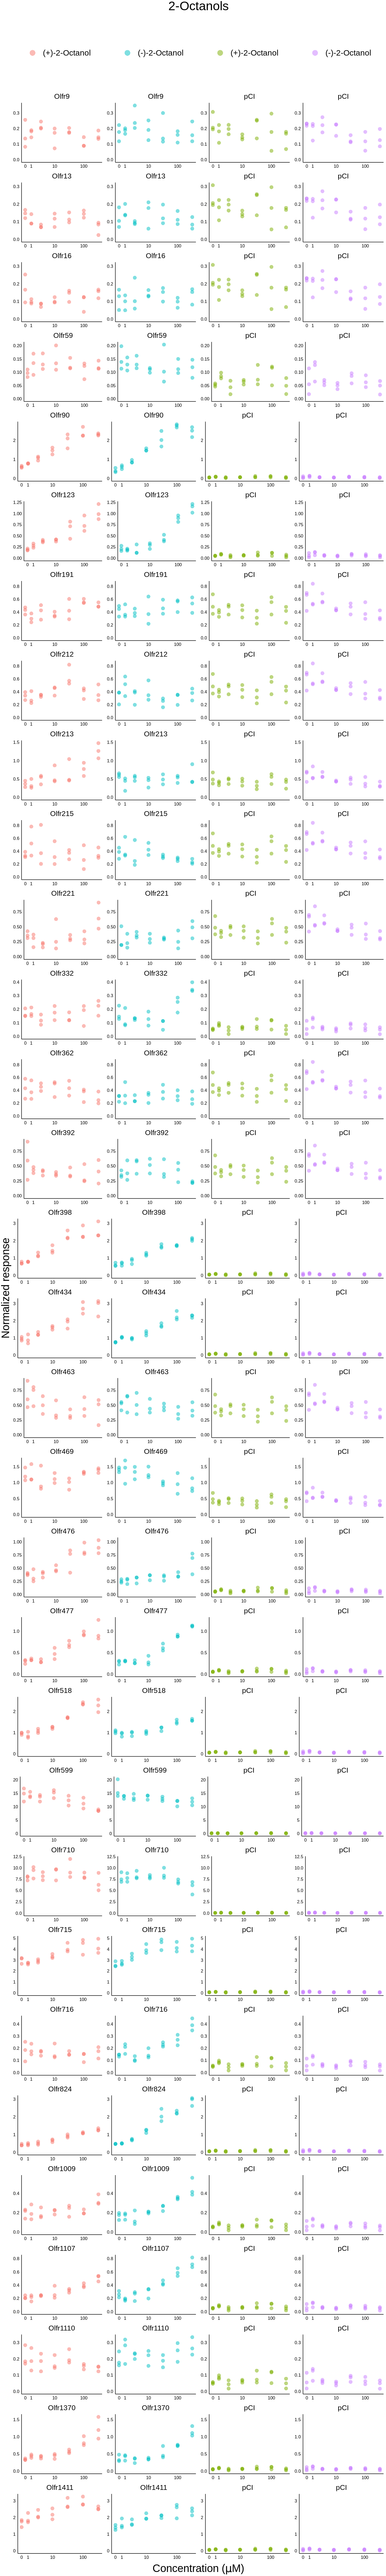

In [20]:
all_octan2ol_plots <- ggarrange(
          plusH_2oct_legend, minusD_2oct_legend, pCI_plusH_2oct_legend, pCI_minusD_2oct_legend, 
          plus_plot_2Octanol_Olfr9, minus_plot_2Octanol_Olfr9, pCI_plus_plot_2Octanol_Olfr9, pCI_minus_plot_2Octanol_Olfr9,
          plus_plot_2Octanol_Olfr13, minus_plot_2Octanol_Olfr13, pCI_plus_plot_2Octanol_Olfr13, pCI_minus_plot_2Octanol_Olfr13,
          plus_plot_2Octanol_Olfr16, minus_plot_2Octanol_Olfr16, pCI_plus_plot_2Octanol_Olfr16, pCI_minus_plot_2Octanol_Olfr16,
          plus_plot_2Octanol_Olfr59, minus_plot_2Octanol_Olfr59, pCI_plus_plot_2Octanol_Olfr59, pCI_minus_plot_2Octanol_Olfr59,
          plus_plot_2Octanol_Olfr90, minus_plot_2Octanol_Olfr90, pCI_plus_plot_2Octanol_Olfr90, pCI_minus_plot_2Octanol_Olfr90,
          plus_plot_2Octanol_Olfr123, minus_plot_2Octanol_Olfr123, pCI_plus_plot_2Octanol_Olfr123, pCI_minus_plot_2Octanol_Olfr123,
          plus_plot_2Octanol_Olfr191, minus_plot_2Octanol_Olfr191, pCI_plus_plot_2Octanol_Olfr191, pCI_minus_plot_2Octanol_Olfr191,
          plus_plot_2Octanol_Olfr212, minus_plot_2Octanol_Olfr212, pCI_plus_plot_2Octanol_Olfr212, pCI_minus_plot_2Octanol_Olfr212,
          plus_plot_2Octanol_Olfr213, minus_plot_2Octanol_Olfr213, pCI_plus_plot_2Octanol_Olfr213, pCI_minus_plot_2Octanol_Olfr213,
          plus_plot_2Octanol_Olfr215, minus_plot_2Octanol_Olfr215, pCI_plus_plot_2Octanol_Olfr215, pCI_minus_plot_2Octanol_Olfr215,
          plus_plot_2Octanol_Olfr221, minus_plot_2Octanol_Olfr221, pCI_plus_plot_2Octanol_Olfr221, pCI_minus_plot_2Octanol_Olfr221,
          plus_plot_2Octanol_Olfr332, minus_plot_2Octanol_Olfr332, pCI_plus_plot_2Octanol_Olfr332, pCI_minus_plot_2Octanol_Olfr332,
          plus_plot_2Octanol_Olfr362, minus_plot_2Octanol_Olfr362, pCI_plus_plot_2Octanol_Olfr362, pCI_minus_plot_2Octanol_Olfr362,
          plus_plot_2Octanol_Olfr392, minus_plot_2Octanol_Olfr392, pCI_plus_plot_2Octanol_Olfr392, pCI_minus_plot_2Octanol_Olfr392,
          plus_plot_2Octanol_Olfr398, minus_plot_2Octanol_Olfr398, pCI_plus_plot_2Octanol_Olfr398, pCI_minus_plot_2Octanol_Olfr398,
          plus_plot_2Octanol_Olfr434, minus_plot_2Octanol_Olfr434, pCI_plus_plot_2Octanol_Olfr434, pCI_minus_plot_2Octanol_Olfr434,
          plus_plot_2Octanol_Olfr463, minus_plot_2Octanol_Olfr463, pCI_plus_plot_2Octanol_Olfr463, pCI_minus_plot_2Octanol_Olfr463,
          plus_plot_2Octanol_Olfr469, minus_plot_2Octanol_Olfr469, pCI_plus_plot_2Octanol_Olfr469, pCI_minus_plot_2Octanol_Olfr469,
          plus_plot_2Octanol_Olfr476, minus_plot_2Octanol_Olfr476, pCI_plus_plot_2Octanol_Olfr476, pCI_minus_plot_2Octanol_Olfr476,
          plus_plot_2Octanol_Olfr477, minus_plot_2Octanol_Olfr477, pCI_plus_plot_2Octanol_Olfr477, pCI_minus_plot_2Octanol_Olfr477,
          plus_plot_2Octanol_Olfr518, minus_plot_2Octanol_Olfr518, pCI_plus_plot_2Octanol_Olfr518, pCI_minus_plot_2Octanol_Olfr518,
          plus_plot_2Octanol_Olfr599, minus_plot_2Octanol_Olfr599, pCI_plus_plot_2Octanol_Olfr599, pCI_minus_plot_2Octanol_Olfr599,
          plus_plot_2Octanol_Olfr710, minus_plot_2Octanol_Olfr710, pCI_plus_plot_2Octanol_Olfr710, pCI_minus_plot_2Octanol_Olfr710,
          plus_plot_2Octanol_Olfr715, minus_plot_2Octanol_Olfr715, pCI_plus_plot_2Octanol_Olfr715, pCI_minus_plot_2Octanol_Olfr715,
          plus_plot_2Octanol_Olfr716, minus_plot_2Octanol_Olfr716, pCI_plus_plot_2Octanol_Olfr716, pCI_minus_plot_2Octanol_Olfr716,
          plus_plot_2Octanol_Olfr824, minus_plot_2Octanol_Olfr824, pCI_plus_plot_2Octanol_Olfr824, pCI_minus_plot_2Octanol_Olfr824,
          plus_plot_2Octanol_Olfr1009, minus_plot_2Octanol_Olfr1009, pCI_plus_plot_2Octanol_Olfr1009, pCI_minus_plot_2Octanol_Olfr1009,
          plus_plot_2Octanol_Olfr1107, minus_plot_2Octanol_Olfr1107, pCI_plus_plot_2Octanol_Olfr1107, pCI_minus_plot_2Octanol_Olfr1107,
          plus_plot_2Octanol_Olfr1110, minus_plot_2Octanol_Olfr1110, pCI_plus_plot_2Octanol_Olfr1110, pCI_minus_plot_2Octanol_Olfr1110,
          plus_plot_2Octanol_Olfr1370, minus_plot_2Octanol_Olfr1370, pCI_plus_plot_2Octanol_Olfr1370, pCI_minus_plot_2Octanol_Olfr1370,
          plus_plot_2Octanol_Olfr1411, minus_plot_2Octanol_Olfr1411, pCI_plus_plot_2Octanol_Olfr1411, pCI_minus_plot_2Octanol_Olfr1411,
          ncol = 4, nrow = 32)

options(repr.plot.width=12, repr.plot.height=80)
all_octan2ol_plots <- annotate_figure(all_octan2ol_plots,
                                      top = text_grob("2-Octanols", color = "black", size = 28),
                                      bottom = text_grob(bquote(paste("Concentration (", mu, "M)")), color = "black", size = 24),
                                      left = text_grob("Normalized response", color = "black", rot = 90, size = 24))

all_octan2ol_plots
#ggsave("./plots/fig_2_supp7.pdf", all_octan2ol_plots, width = 12, height = 80, limitsize = FALSE)

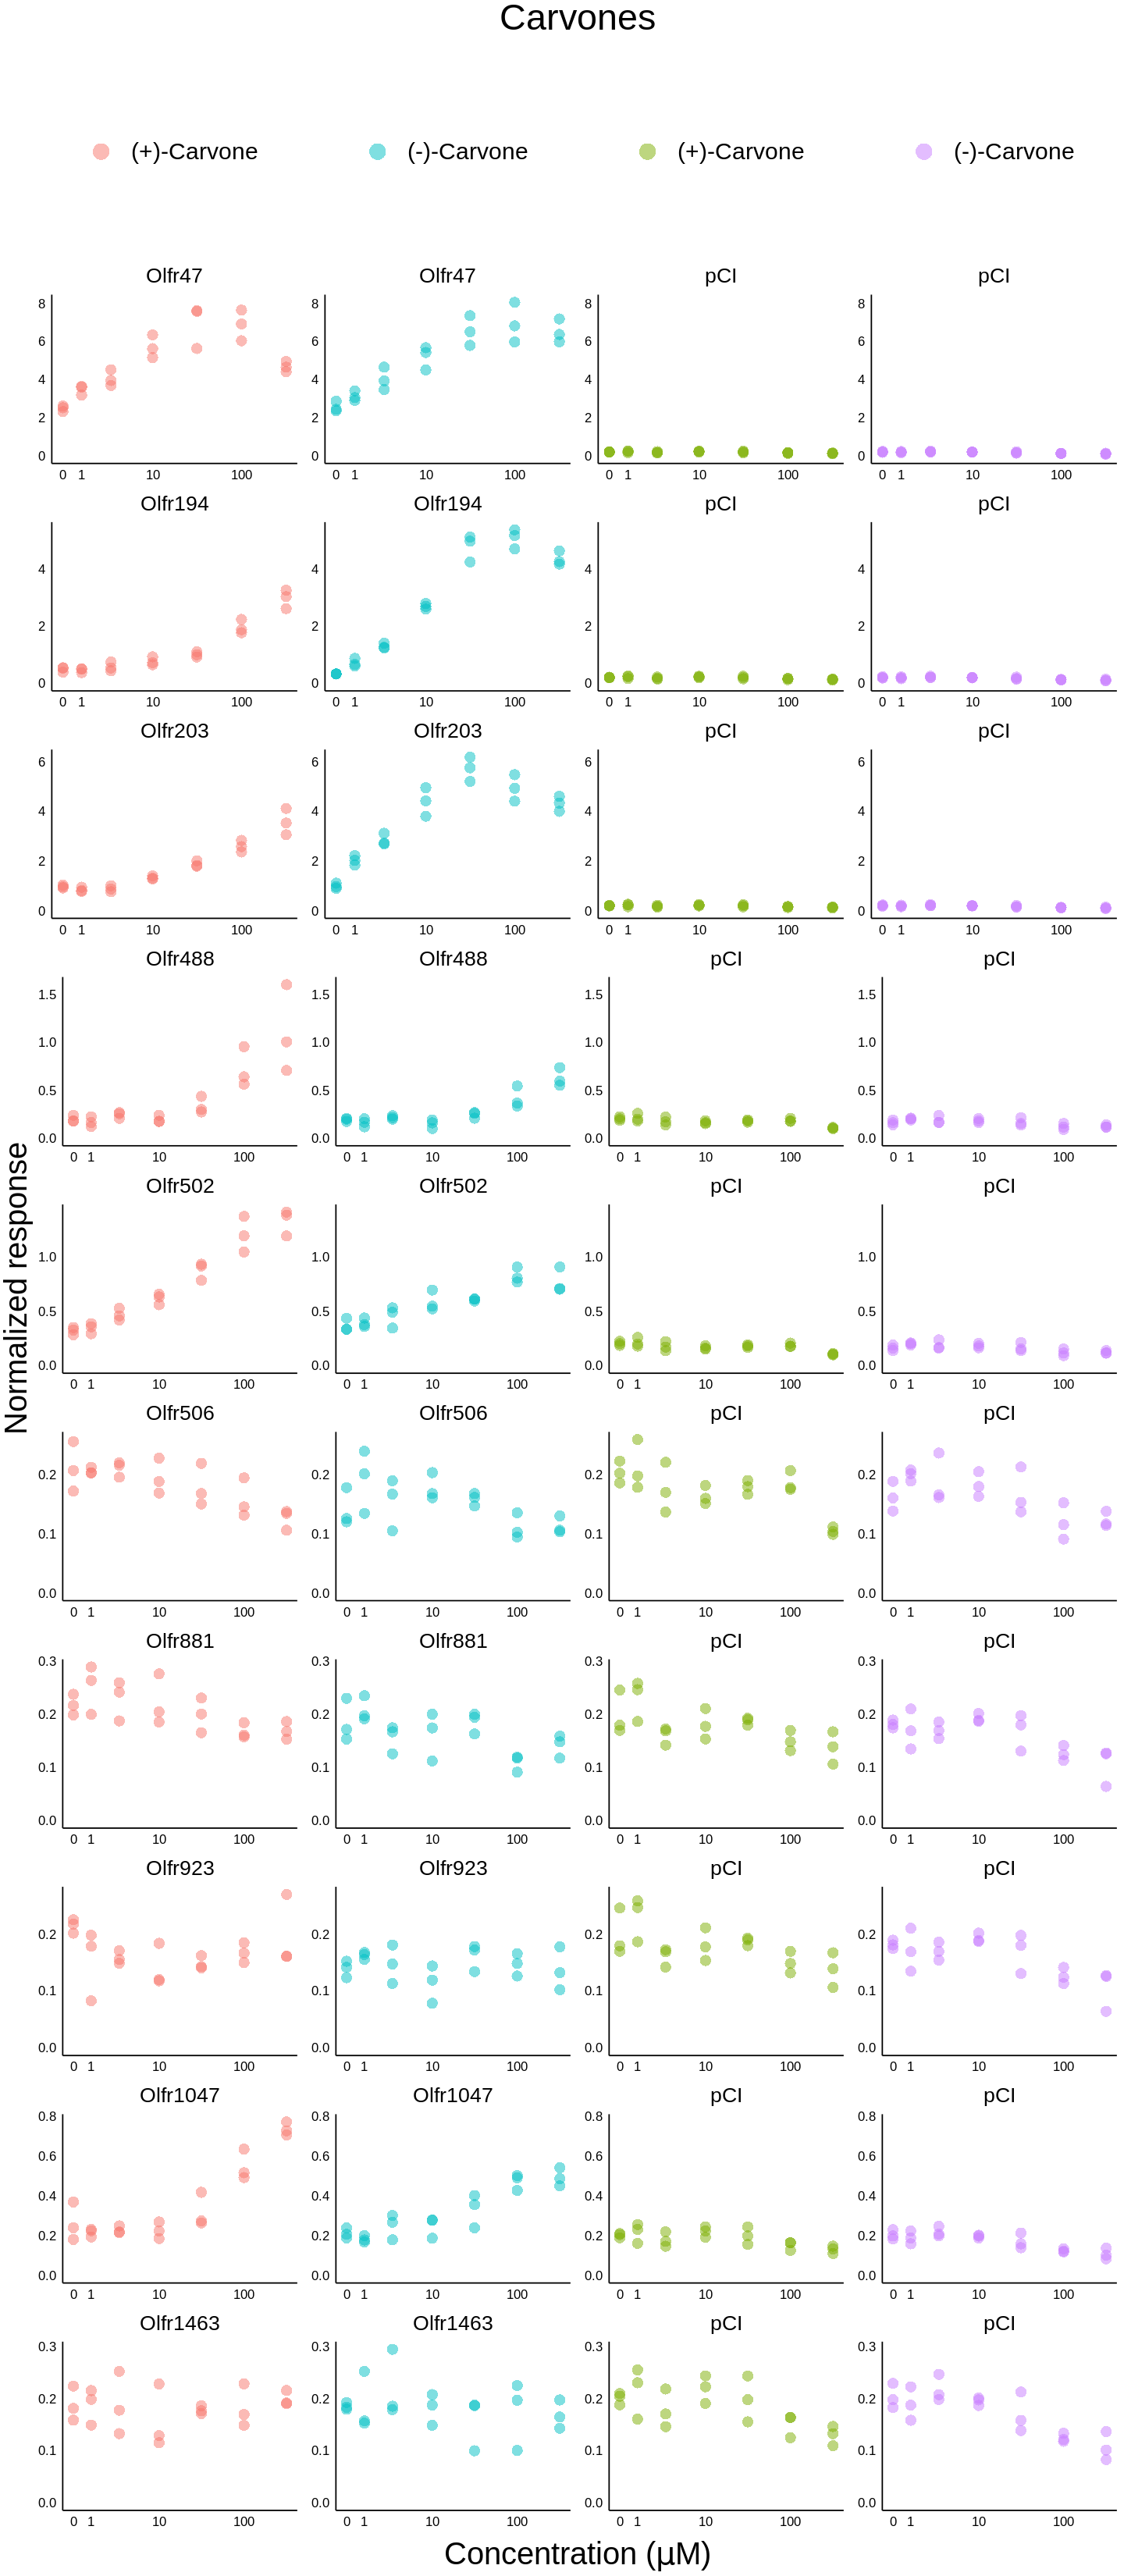

In [21]:
all_carvone_plots <- ggarrange(plusH_carv_legend, minusD_carv_legend, pCI_plusH_carv_legend, pCI_minusD_carv_legend,
    plus_plot_Carvone_Olfr47, minus_plot_Carvone_Olfr47, pCI_plus_plot_Carvone_Olfr47, pCI_minus_plot_Carvone_Olfr47,
    plus_plot_Carvone_Olfr194, minus_plot_Carvone_Olfr194, pCI_plus_plot_Carvone_Olfr194, pCI_minus_plot_Carvone_Olfr194,
    plus_plot_Carvone_Olfr203, minus_plot_Carvone_Olfr203, pCI_plus_plot_Carvone_Olfr203, pCI_minus_plot_Carvone_Olfr203,
    plus_plot_Carvone_Olfr488, minus_plot_Carvone_Olfr488, pCI_plus_plot_Carvone_Olfr488, pCI_minus_plot_Carvone_Olfr488,
    plus_plot_Carvone_Olfr502, minus_plot_Carvone_Olfr502, pCI_plus_plot_Carvone_Olfr502, pCI_minus_plot_Carvone_Olfr502,
    plus_plot_Carvone_Olfr506, minus_plot_Carvone_Olfr506, pCI_plus_plot_Carvone_Olfr506, pCI_minus_plot_Carvone_Olfr506,
    plus_plot_Carvone_Olfr881, minus_plot_Carvone_Olfr881, pCI_plus_plot_Carvone_Olfr881, pCI_minus_plot_Carvone_Olfr881,
    plus_plot_Carvone_Olfr923, minus_plot_Carvone_Olfr923, pCI_plus_plot_Carvone_Olfr923, pCI_minus_plot_Carvone_Olfr923,
    plus_plot_Carvone_Olfr1047, minus_plot_Carvone_Olfr1047, pCI_plus_plot_Carvone_Olfr1047, pCI_minus_plot_Carvone_Olfr1047,
    plus_plot_Carvone_Olfr1463, minus_plot_Carvone_Olfr1463, pCI_plus_plot_Carvone_Olfr1463, pCI_minus_plot_Carvone_Olfr1463,
    ncol = 4, nrow = 11)

all_carvone_plots <- annotate_figure(all_carvone_plots,
                                      top = text_grob("Carvones", color = "black", size = 28),
                                      bottom = text_grob(bquote(paste("Concentration (", mu, "M)")), color = "black", size = 24),
                                      left = text_grob("Normalized response", color = "black", rot = 90, size = 24))

options(repr.plot.width=12, repr.plot.height=27.5)
all_carvone_plots
#ggsave("./plots/fig_2_supp3.pdf", all_carvone_plots, width = 12, height = 27.5, limitsize = FALSE)

Warning message:
“Removed 4 rows containing missing values (geom_point).”
Warning message:
“Removed 2 rows containing missing values (geom_point).”
Warning message:
“Removed 2 rows containing missing values (geom_point).”
Warning message:
“Removed 4 rows containing missing values (geom_point).”
Warning message:
“Removed 4 rows containing missing values (geom_point).”
Warning message:
“Removed 2 rows containing missing values (geom_point).”
Warning message:
“Removed 2 rows containing missing values (geom_point).”
Warning message:
“Removed 4 rows containing missing values (geom_point).”
Warning message:
“Removed 1 rows containing missing values (geom_point).”
Warning message:
“Removed 1 rows containing missing values (geom_point).”
Warning message:
“Removed 1 rows containing missing values (geom_point).”
Warning message:
“Removed 1 rows containing missing values (geom_point).”
Warning message:
“Removed 3 rows containing missing values (geom_point).”
Warning message:
“Removed 2 rows conta

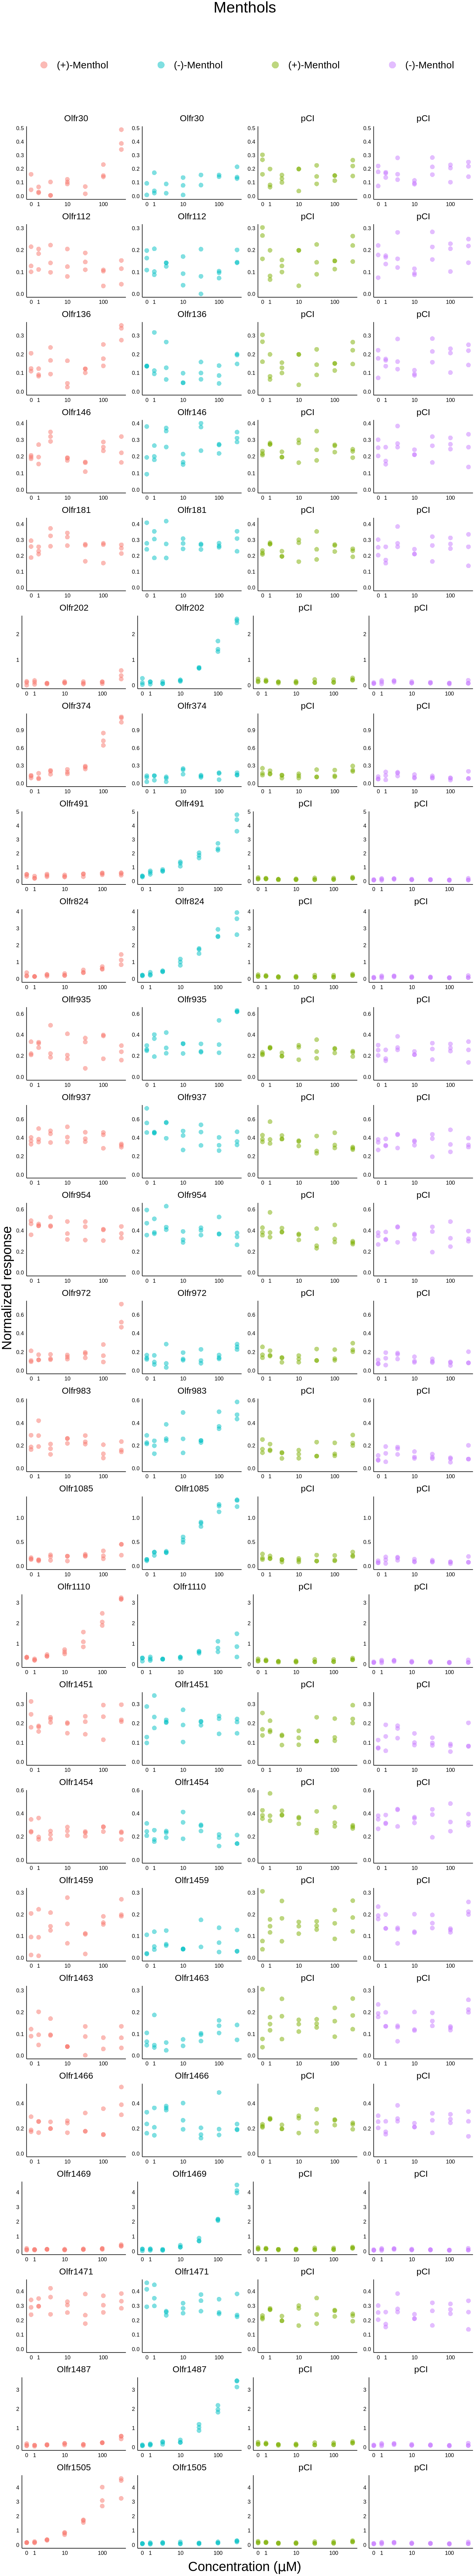

In [22]:
all_menthol_plots <- ggarrange(plusH_ment_legend, minusD_ment_legend, pCI_plusH_ment_legend, pCI_minusD_ment_legend,
    plus_plot_Menthol_Olfr30, minus_plot_Menthol_Olfr30, pCI_plus_plot_Menthol_Olfr30, pCI_minus_plot_Menthol_Olfr30,
    plus_plot_Menthol_Olfr112, minus_plot_Menthol_Olfr112, pCI_plus_plot_Menthol_Olfr112, pCI_minus_plot_Menthol_Olfr112,
    plus_plot_Menthol_Olfr136, minus_plot_Menthol_Olfr136, pCI_plus_plot_Menthol_Olfr136, pCI_minus_plot_Menthol_Olfr136,
    plus_plot_Menthol_Olfr146, minus_plot_Menthol_Olfr146, pCI_plus_plot_Menthol_Olfr146, pCI_minus_plot_Menthol_Olfr146,
    plus_plot_Menthol_Olfr181, minus_plot_Menthol_Olfr181, pCI_plus_plot_Menthol_Olfr181, pCI_minus_plot_Menthol_Olfr181,
    plus_plot_Menthol_Olfr202, minus_plot_Menthol_Olfr202, pCI_plus_plot_Menthol_Olfr202, pCI_minus_plot_Menthol_Olfr202,
    plus_plot_Menthol_Olfr374, minus_plot_Menthol_Olfr374, pCI_plus_plot_Menthol_Olfr374, pCI_minus_plot_Menthol_Olfr374,
    plus_plot_Menthol_Olfr491, minus_plot_Menthol_Olfr491, pCI_plus_plot_Menthol_Olfr491, pCI_minus_plot_Menthol_Olfr491,
    plus_plot_Menthol_Olfr824, minus_plot_Menthol_Olfr824, pCI_plus_plot_Menthol_Olfr824, pCI_minus_plot_Menthol_Olfr824,
    plus_plot_Menthol_Olfr935, minus_plot_Menthol_Olfr935, pCI_plus_plot_Menthol_Olfr935, pCI_minus_plot_Menthol_Olfr935,
    plus_plot_Menthol_Olfr937, minus_plot_Menthol_Olfr937, pCI_plus_plot_Menthol_Olfr937, pCI_minus_plot_Menthol_Olfr937,
    plus_plot_Menthol_Olfr954, minus_plot_Menthol_Olfr954, pCI_plus_plot_Menthol_Olfr954, pCI_minus_plot_Menthol_Olfr954,
    plus_plot_Menthol_Olfr972, minus_plot_Menthol_Olfr972, pCI_plus_plot_Menthol_Olfr972, pCI_minus_plot_Menthol_Olfr972,
    plus_plot_Menthol_Olfr983, minus_plot_Menthol_Olfr983, pCI_plus_plot_Menthol_Olfr983, pCI_minus_plot_Menthol_Olfr983,
    plus_plot_Menthol_Olfr1085, minus_plot_Menthol_Olfr1085, pCI_plus_plot_Menthol_Olfr1085, pCI_minus_plot_Menthol_Olfr1085,
    plus_plot_Menthol_Olfr1110, minus_plot_Menthol_Olfr1110, pCI_plus_plot_Menthol_Olfr1110, pCI_minus_plot_Menthol_Olfr1110,
    plus_plot_Menthol_Olfr1451, minus_plot_Menthol_Olfr1451, pCI_plus_plot_Menthol_Olfr1451, pCI_minus_plot_Menthol_Olfr1451,
    plus_plot_Menthol_Olfr1454, minus_plot_Menthol_Olfr1454, pCI_plus_plot_Menthol_Olfr1454, pCI_minus_plot_Menthol_Olfr1454,
    plus_plot_Menthol_Olfr1459, minus_plot_Menthol_Olfr1459, pCI_plus_plot_Menthol_Olfr1459, pCI_minus_plot_Menthol_Olfr1459,
    plus_plot_Menthol_Olfr1463, minus_plot_Menthol_Olfr1463, pCI_plus_plot_Menthol_Olfr1463, pCI_minus_plot_Menthol_Olfr1463,
    plus_plot_Menthol_Olfr1466, minus_plot_Menthol_Olfr1466, pCI_plus_plot_Menthol_Olfr1466, pCI_minus_plot_Menthol_Olfr1466,
    plus_plot_Menthol_Olfr1469, minus_plot_Menthol_Olfr1469, pCI_plus_plot_Menthol_Olfr1469, pCI_minus_plot_Menthol_Olfr1469,
    plus_plot_Menthol_Olfr1471, minus_plot_Menthol_Olfr1471, pCI_plus_plot_Menthol_Olfr1471, pCI_minus_plot_Menthol_Olfr1471,
    plus_plot_Menthol_Olfr1487, minus_plot_Menthol_Olfr1487, pCI_plus_plot_Menthol_Olfr1487, pCI_minus_plot_Menthol_Olfr1487,
    plus_plot_Menthol_Olfr1505, minus_plot_Menthol_Olfr1505, pCI_plus_plot_Menthol_Olfr1505, pCI_minus_plot_Menthol_Olfr1505,
    ncol = 4, nrow = 26)

all_menthol_plots <- annotate_figure(all_menthol_plots,
                                      top = text_grob("Menthols", color = "black", size = 28),
                                      bottom = text_grob(bquote(paste("Concentration (", mu, "M)")), color = "black", size = 24),
                                      left = text_grob("Normalized response", color = "black", rot = 90, size = 24))

options(repr.plot.width=12, repr.plot.height=65)
all_menthol_plots
#ggsave("./plots/fig_2_supp5.pdf", all_menthol_plots, width = 12, height = 65, limitsize = FALSE)

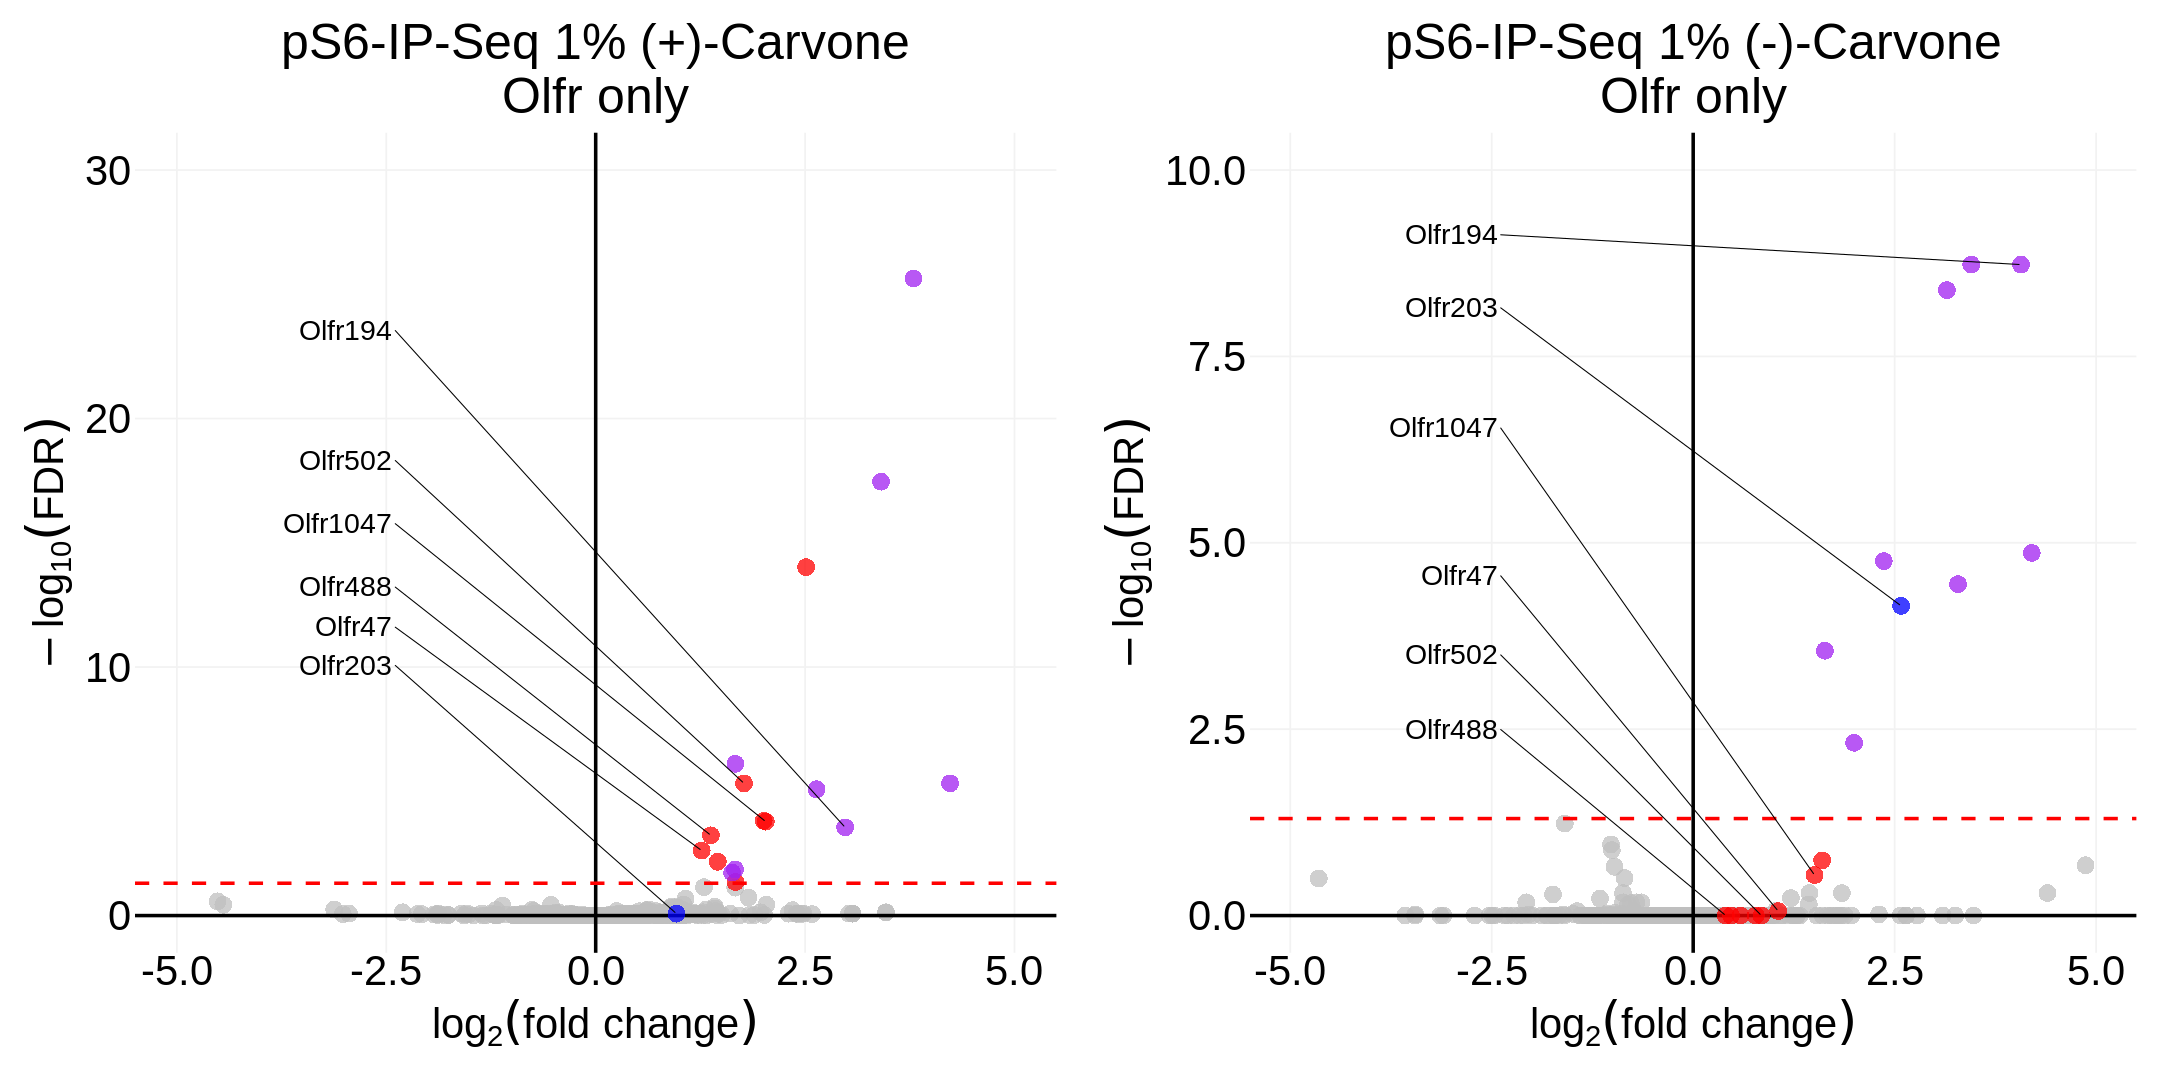

In [22]:
pcarv_vp <- ggplot(data = subset(pcarv_vivo, response == "none"), aes(x = logFC, y = -log10(FDR))) +
    geom_point(size = 5, stroke = 0, alpha = 0.75, color = "gray75") + 
    geom_vline(xintercept = 0, size = 1) +
    geom_hline(yintercept = 0, size = 1) +
    geom_hline(yintercept = -log10(0.05), color = "red", linetype = "dashed", size = 1) +
    geom_point(data = subset(pcarv_vivo, response == "pCarvone"), size = 5, stroke = 0, alpha = 0.75, color = "red") + 
    geom_point(data = subset(pcarv_vivo, response == "nCarvone"), size = 5, stroke = 0, alpha = 0.75, color = "blue") + 
    geom_point(data = subset(pcarv_vivo, response == "both"), size = 5, stroke = 0, alpha = 0.75, color = "purple") + 
    scale_x_continuous(breaks = seq(-5,5,2.5), limits = c(-5,5)) +
    scale_y_continuous(breaks = seq(0,30,10), limits = c(0,30)) +
    ggtitle("pS6-IP-Seq 1% (+)-Carvone\nOlfr only") +
    xlab(expression(log[2](fold~change))) +
    ylab(expression(-log[10](FDR))) +
    geom_text_repel(data = subset(pcarv_vivo, symbol == "Olfr203"), label = subset(pcarv_vivo, symbol == "Olfr203")$symbol,
              nudge_x = -2.5-(subset(pcarv_vivo, symbol == "Olfr203")$logFC),
              nudge_y = 10, size = 6, aes(segment.size = .3), hjust = 1) +
    geom_text_repel(data = subset(pcarv_vivo, symbol == "Olfr1047"), label = subset(pcarv_vivo, symbol == "Olfr1047")$symbol,
              nudge_x = -2.5-(subset(pcarv_vivo, symbol == "Olfr1047")$logFC),
              nudge_y = 12, size = 6, aes(segment.size = .3), hjust = 1) +
    geom_text_repel(data = subset(pcarv_vivo, symbol == "Olfr194"), label = subset(pcarv_vivo, symbol == "Olfr194")$symbol,
              nudge_x = -2.5-(subset(pcarv_vivo, symbol == "Olfr194")$logFC),
              nudge_y = 20, size = 6, aes(segment.size = .3), hjust = 1) +
    geom_text_repel(data = subset(pcarv_vivo, symbol == "Olfr47"), label = subset(pcarv_vivo, symbol == "Olfr47")$symbol,
              nudge_x = -2.5-(subset(pcarv_vivo, symbol == "Olfr47")$logFC),
              nudge_y = 9, size = 6, aes(segment.size = .3), hjust = 1) +
    geom_text_repel(data = subset(pcarv_vivo, symbol == "Olfr488"), label = subset(pcarv_vivo, symbol == "Olfr488")$symbol,
              nudge_x = -2.5-(subset(pcarv_vivo, symbol == "Olfr488")$logFC),
              nudge_y = 10, size = 6, aes(segment.size = .3), hjust = 1) +
    geom_text_repel(data = subset(pcarv_vivo, symbol == "Olfr502"), label = subset(pcarv_vivo, symbol == "Olfr502")$symbol,
              nudge_x = -2.5-(subset(pcarv_vivo, symbol == "Olfr502")$logFC),
              nudge_y = 13, size = 6, aes(segment.size = .3), hjust = 1) +
    theme(legend.position = "none",
          plot.title = element_text(size = 30, hjust = 0.5, color = "black"),
          plot.background = element_blank(),
          panel.border = element_blank(),
          panel.grid.major = element_line(color="gray95"),
          panel.grid.minor = element_blank(),
          panel.background = element_blank(),
          axis.line.x = element_blank(),
          axis.line.y = element_blank(),
          axis.text.x = element_text(color = "black", size = 25),
          axis.text.y = element_text(color = "black", size = 25),
          axis.title.x = element_text(color = "black", size = 25),
          axis.title.y = element_text(color = "black", size = 25),
          axis.ticks.length.x = unit(0, "cm"),
          axis.ticks.length.y = unit(0, "cm"),
          plot.margin = margin(t=0.5,r=0.5,b=0.5,l=0.5, "cm"))

ncarv_vp <- ggplot(data = subset(ncarv_vivo, response == "none"), aes(x = logFC, y = -log10(FDR))) +
    geom_point(size = 5, stroke = 0, alpha = 0.75, color = "gray75") + 
    geom_vline(xintercept = 0, size = 1) +
    geom_hline(yintercept = 0, size = 1) +
    geom_hline(yintercept = -log10(0.05), color = "red", linetype = "dashed", size = 1) +
    geom_point(data = subset(ncarv_vivo, response == "pCarvone"), size = 5, stroke = 0, alpha = 0.75, color = "red") + 
    geom_point(data = subset(ncarv_vivo, response == "nCarvone"), size = 5, stroke = 0, alpha = 0.75, color = "blue") + 
    geom_point(data = subset(ncarv_vivo, response == "both"), size = 5, stroke = 0, alpha = 0.75, color = "purple") + 
    ggtitle("pS6-IP-Seq 1% (-)-Carvone\nOlfr only") +
    scale_x_continuous(breaks = seq(-5,5,2.5), limits = c(-5,5)) +
    scale_y_continuous(breaks = seq(0,10,2.5), limits = c(0,10)) +
    xlab(expression(log[2](fold~change))) +
    ylab(expression(-log[10](FDR))) +
    geom_text_repel(data = subset(ncarv_vivo, symbol == "Olfr203"), label = subset(ncarv_vivo, symbol == "Olfr203")$symbol,
              nudge_x = -2.5-(subset(ncarv_vivo, symbol == "Olfr203")$logFC),
              nudge_y = 4, size = 6, aes(segment.size = .3), hjust = 1) +
    geom_text_repel(data = subset(ncarv_vivo, symbol == "Olfr1047"), label = subset(ncarv_vivo, symbol == "Olfr1047")$symbol,
              nudge_x = -2.5-(subset(ncarv_vivo, symbol == "Olfr1047")$logFC),
              nudge_y = 6, size = 6, aes(segment.size = .3), hjust = 1) +
    geom_text_repel(data = subset(ncarv_vivo, symbol == "Olfr194"), label = subset(ncarv_vivo, symbol == "Olfr194")$symbol,
              nudge_x = -2.5-(subset(ncarv_vivo, symbol == "Olfr194")$logFC),
              nudge_y = .4, size = 6, aes(segment.size = .3), hjust = 1) +
    geom_text_repel(data = subset(ncarv_vivo, symbol == "Olfr47"), label = subset(ncarv_vivo, symbol == "Olfr47")$symbol,
              nudge_x = -2.5-(subset(ncarv_vivo, symbol == "Olfr47")$logFC),
              nudge_y = 4.5, size = 6, aes(segment.size = .3), hjust = 1) +
    geom_text_repel(data = subset(ncarv_vivo, symbol == "Olfr488"), label = subset(ncarv_vivo, symbol == "Olfr488")$symbol,
              nudge_x = -2.5-(subset(ncarv_vivo, symbol == "Olfr488")$logFC),
              nudge_y = 2.5, size = 6, aes(segment.size = .3), hjust = 1) +
    geom_text_repel(data = subset(ncarv_vivo, symbol == "Olfr502"), label = subset(ncarv_vivo, symbol == "Olfr502")$symbol,
              nudge_x = -2.5-(subset(ncarv_vivo, symbol == "Olfr502")$logFC),
              nudge_y = 3.5, size = 6, aes(segment.size = .3), hjust = 1) +
    theme(legend.position = "none",
          plot.title = element_text(size = 30, hjust = 0.5, color = "black"),
          plot.background = element_blank(),
          panel.border = element_blank(),
          panel.grid.major = element_line(color="gray95"),
          panel.grid.minor = element_blank(),
          panel.background = element_blank(),
          axis.line.x = element_blank(),
          axis.line.y = element_blank(),
          axis.text.x = element_text(color = "black", size = 25),
          axis.text.y = element_text(color = "black", size = 25),
          axis.title.x = element_text(color = "black", size = 25),
          axis.title.y = element_text(color = "black", size = 25),
          axis.ticks.length.x = unit(0, "cm"),
          axis.ticks.length.y = unit(0, "cm"),
          plot.margin = margin(t=0.5,r=0.5,b=0.5,l=0.5, "cm"))

options(repr.plot.width=18, repr.plot.height=9)
carv_vp <- ggarrange(pcarv_vp, ncarv_vp, ncol = 2, nrow = 1)
carv_vp
#ggsave("./plots/fig_1_supp2a.pdf",carv_vp, height = 9, width = 18)

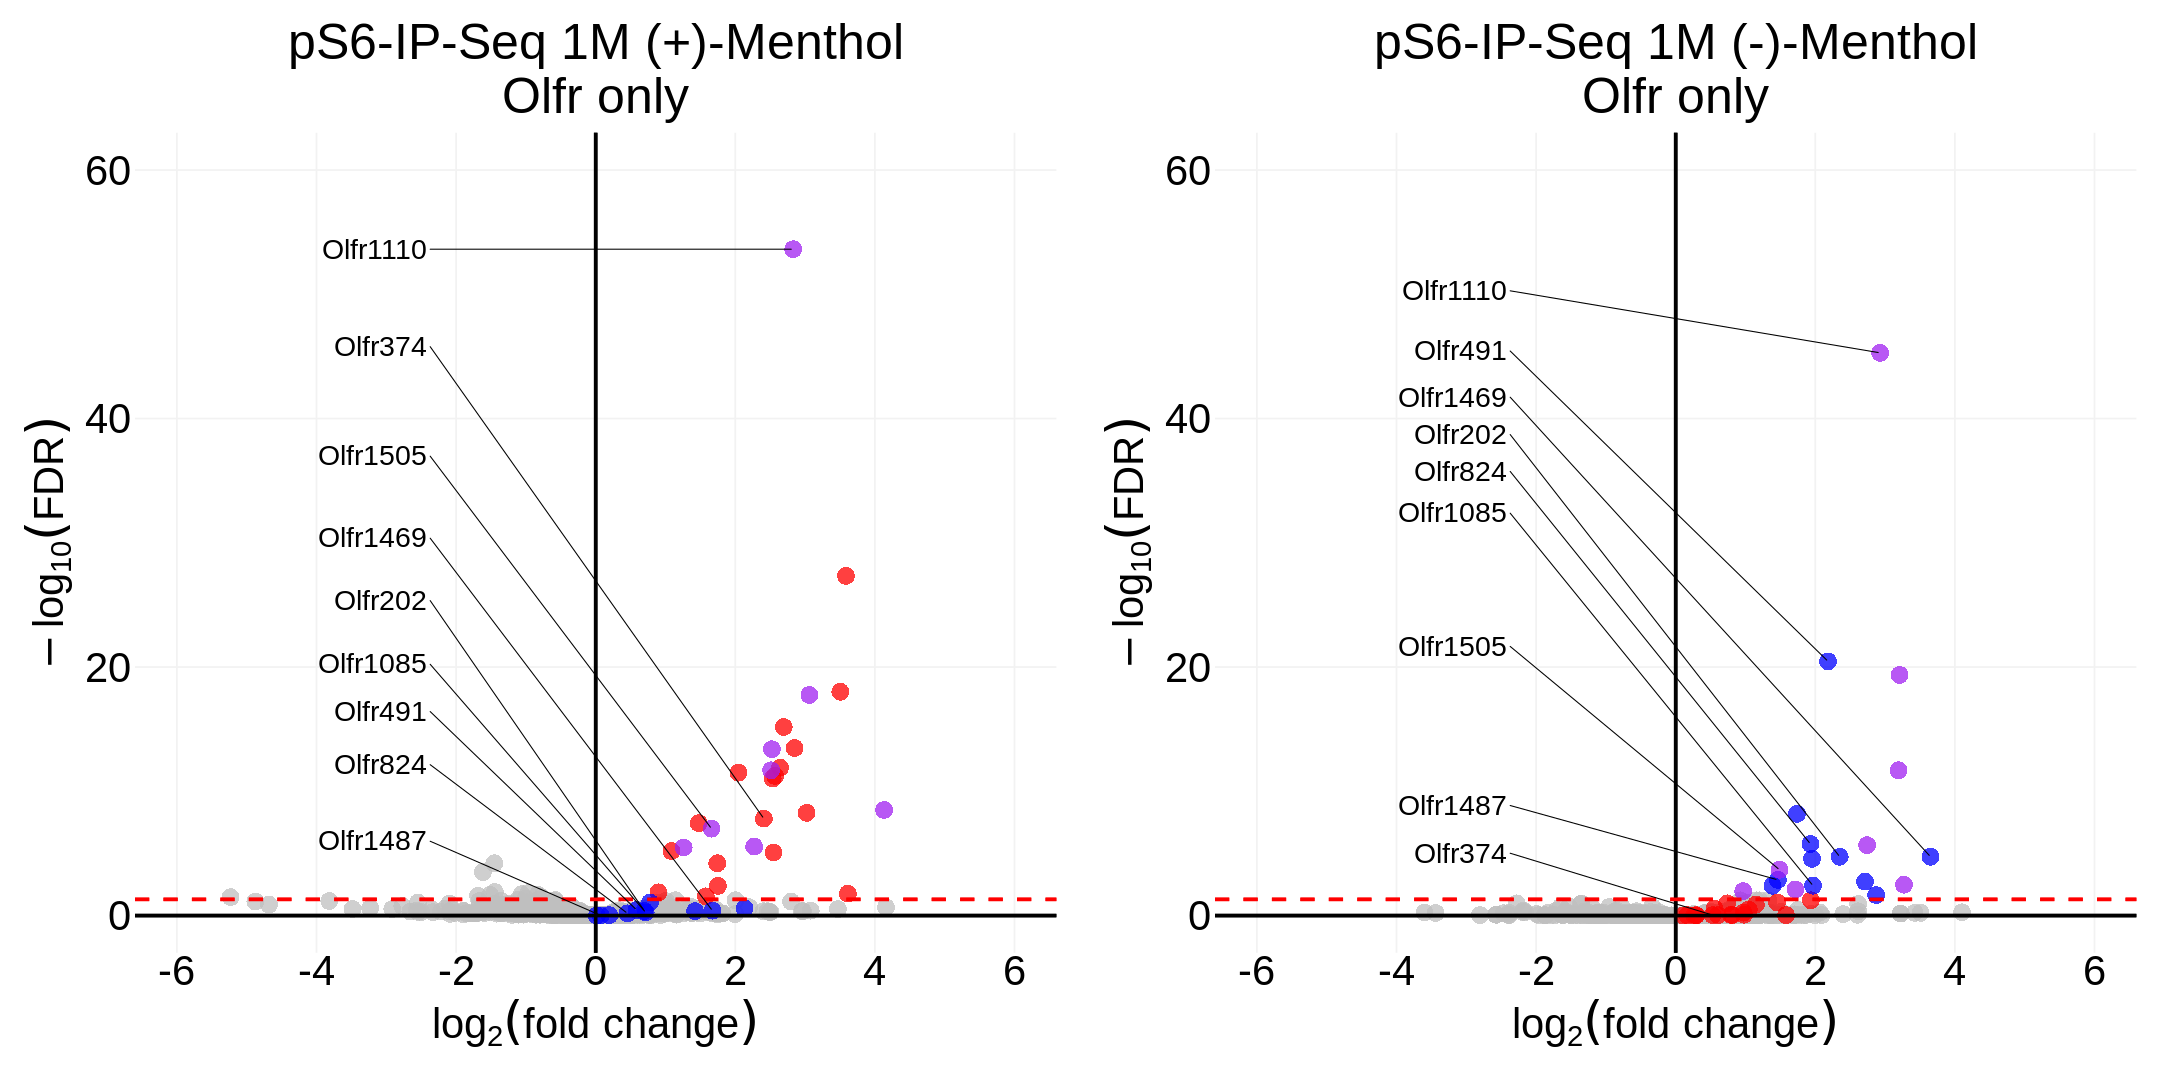

In [23]:
pment_vp <- ggplot(data = subset(pment_vivo, response == "none"), aes(x = logFC, y = -log10(FDR))) +
    geom_point(size = 5, stroke = 0, alpha = 0.75, color = "gray75") + 
    geom_vline(xintercept = 0, size = 1) +
    geom_hline(yintercept = 0, size = 1) +
    geom_hline(yintercept = -log10(0.05), color = "red", linetype = "dashed", size = 1) +
    geom_point(data = subset(pment_vivo, response == "pMenthol"), size = 5, stroke = 0, alpha = 0.75, color = "red") + 
    geom_point(data = subset(pment_vivo, response == "nMenthol"), size = 5, stroke = 0, alpha = 0.75, color = "blue") + 
    geom_point(data = subset(pment_vivo, response == "both"), size = 5, stroke = 0, alpha = 0.75, color = "purple") + 
    scale_x_continuous(breaks = seq(-6,6,2), limits = c(-6,6)) +
    scale_y_continuous(breaks = seq(0,60,20), limits = c(0,60)) +
    geom_vline(xintercept = 0, size = 1) +
    geom_hline(yintercept = 0, size = 1) +
    geom_hline(yintercept = -log10(0.05), color = "red", linetype = "dashed", size = 1) +
    ggtitle("pS6-IP-Seq 1M (+)-Menthol\nOlfr only") +
    xlab(expression(log[2](fold~change))) +
    ylab(expression(-log[10](FDR))) +
    geom_text_repel(data = subset(pment_vivo, symbol == "Olfr491"), label = subset(pment_vivo, symbol == "Olfr491")$symbol,
              nudge_x = -2.5-(subset(pment_vivo, symbol == "Olfr491")$logFC),
              nudge_y = 16, size = 6, aes(segment.size = .3), hjust = 1) +
    geom_text_repel(data = subset(pment_vivo, symbol == "Olfr1085"), label = subset(pment_vivo, symbol == "Olfr1085")$symbol,
              nudge_x = -2.5-(subset(pment_vivo, symbol == "Olfr1085")$logFC),
              nudge_y = 20, size = 6, aes(segment.size = .3), hjust = 1) +
    geom_text_repel(data = subset(pment_vivo, symbol == "Olfr824"), label = subset(pment_vivo, symbol == "Olfr824")$symbol,
              nudge_x = -2.5-(subset(pment_vivo, symbol == "Olfr824")$logFC),
              nudge_y = 12, size = 6, aes(segment.size = .3), hjust = 1) +
    geom_text_repel(data = subset(pment_vivo, symbol == "Olfr1505"), label = subset(pment_vivo, symbol == "Olfr1505")$symbol,
              nudge_x = -2.5-(subset(pment_vivo, symbol == "Olfr1505")$logFC),
              nudge_y = 30, size = 6, aes(segment.size = .3), hjust = 1) +
    geom_text_repel(data = subset(pment_vivo, symbol == "Olfr202"), label = subset(pment_vivo, symbol == "Olfr202")$symbol,
              nudge_x = -2.5-(subset(pment_vivo, symbol == "Olfr202")$logFC),
              nudge_y = 25, size = 6, aes(segment.size = .3), hjust = 1) +
    geom_text_repel(data = subset(pment_vivo, symbol == "Olfr1469"), label = subset(pment_vivo, symbol == "Olfr1469")$symbol,
              nudge_x = -2.5-(subset(pment_vivo, symbol == "Olfr1469")$logFC),
              nudge_y = 30, size = 6, aes(segment.size = .3), hjust = 1) +
    geom_text_repel(data = subset(pment_vivo, symbol == "Olfr374"), label = subset(pment_vivo, symbol == "Olfr374")$symbol,
              nudge_x = -2.5-(subset(pment_vivo, symbol == "Olfr374")$logFC),
              nudge_y = 38, size = 6, aes(segment.size = .3), hjust = 1) +
    geom_text_repel(data = subset(pment_vivo, symbol == "Olfr1110"), label = subset(pment_vivo, symbol == "Olfr1110")$symbol,
              nudge_x = -2.5-(subset(pment_vivo, symbol == "Olfr1110")$logFC),
              size = 6, aes(segment.size = .3), hjust = 1) +
    geom_text_repel(data = subset(pment_vivo, symbol == "Olfr1487"), label = subset(pment_vivo, symbol == "Olfr1487")$symbol,
              nudge_x = -2.5-(subset(pment_vivo, symbol == "Olfr1487")$logFC),
              nudge_y = 6, size = 6, aes(segment.size = .3), hjust = 1) +
    theme(legend.position = "none",
          plot.title = element_text(size = 30, hjust = 0.5, color = "black"),
          plot.background = element_blank(),
          panel.border = element_blank(),
          panel.grid.major = element_line(color="gray95"),
          panel.grid.minor = element_blank(),
          panel.background = element_blank(),
          axis.line.x = element_blank(),
          axis.line.y = element_blank(),
          axis.text.x = element_text(color = "black", size = 25),
          axis.text.y = element_text(color = "black", size = 25),
          axis.title.x = element_text(color = "black", size = 25),
          axis.title.y = element_text(color = "black", size = 25),
          axis.ticks.length.x = unit(0, "cm"),
          axis.ticks.length.y = unit(0, "cm"),
          plot.margin = margin(t=0.5,r=0.5,b=0.5,l=0.5, "cm"))

nment_vp <- ggplot(data = subset(nment_vivo, response == "none"), aes(x = logFC, y = -log10(FDR))) +
    geom_point(size = 5, stroke = 0, alpha = 0.75, color = "gray75") + 
    geom_vline(xintercept = 0, size = 1) +
    geom_hline(yintercept = 0, size = 1) +
    geom_hline(yintercept = -log10(0.05), color = "red", linetype = "dashed", size = 1) +
    geom_point(data = subset(nment_vivo, response == "pMenthol"), size = 5, stroke = 0, alpha = 0.75, color = "red") + 
    geom_point(data = subset(nment_vivo, response == "nMenthol"), size = 5, stroke = 0, alpha = 0.75, color = "blue") + 
    geom_point(data = subset(nment_vivo, response == "both"), size = 5, stroke = 0, alpha = 0.75, color = "purple") + 
    scale_x_continuous(breaks = seq(-6,6,2), limits = c(-6,6)) +
    scale_y_continuous(breaks = seq(0,60,20), limits = c(0,60)) +
    geom_vline(xintercept = 0, size = 1) +
    geom_hline(yintercept = 0, size = 1) +
    geom_hline(yintercept = -log10(0.05), color = "red", linetype = "dashed", size = 1) +
    ggtitle("pS6-IP-Seq 1M (-)-Menthol\nOlfr only") +
    xlab(expression(log[2](fold~change))) +
    ylab(expression(-log[10](FDR))) +
    geom_text_repel(data = subset(nment_vivo, symbol == "Olfr491"), label = subset(nment_vivo, symbol == "Olfr491")$symbol,
              nudge_x = -2.5-(subset(nment_vivo, symbol == "Olfr491")$logFC),
              nudge_y = 25, size = 6, aes(segment.size = .3), hjust = 1) +
    geom_text_repel(data = subset(nment_vivo, symbol == "Olfr1085"), label = subset(nment_vivo, symbol == "Olfr1085")$symbol,
              nudge_x = -2.5-(subset(nment_vivo, symbol == "Olfr1085")$logFC),
              nudge_y = 30, size = 6, aes(segment.size = .3), hjust = 1) +
    geom_text_repel(data = subset(nment_vivo, symbol == "Olfr824"), label = subset(nment_vivo, symbol == "Olfr824")$symbol,
              nudge_x = -2.5-(subset(nment_vivo, symbol == "Olfr824")$logFC),
              nudge_y = 30, size = 6, aes(segment.size = .3), hjust = 1) +
    geom_text_repel(data = subset(nment_vivo, symbol == "Olfr1505"), label = subset(nment_vivo, symbol == "Olfr1505")$symbol,
              nudge_x = -2.5-(subset(nment_vivo, symbol == "Olfr1505")$logFC),
              nudge_y = 18, size = 6, aes(segment.size = .3), hjust = 1) +
    geom_text_repel(data = subset(nment_vivo, symbol == "Olfr202"), label = subset(nment_vivo, symbol == "Olfr202")$symbol,
              nudge_x = -2.5-(subset(nment_vivo, symbol == "Olfr202")$logFC),
              nudge_y = 34, size = 6, aes(segment.size = .3), hjust = 1) +
    geom_text_repel(data = subset(nment_vivo, symbol == "Olfr1469"), label = subset(nment_vivo, symbol == "Olfr1469")$symbol,
              nudge_x = -2.5-(subset(nment_vivo, symbol == "Olfr1469")$logFC),
              nudge_y = 37, size = 6, aes(segment.size = .3), hjust = 1) +
    geom_text_repel(data = subset(nment_vivo, symbol == "Olfr374"), label = subset(nment_vivo, symbol == "Olfr374")$symbol,
              nudge_x = -2.5-(subset(nment_vivo, symbol == "Olfr374")$logFC),
              nudge_y = 5, size = 6, aes(segment.size = .3), hjust = 1) +
    geom_text_repel(data = subset(nment_vivo, symbol == "Olfr1110"), label = subset(nment_vivo, symbol == "Olfr1110")$symbol,
              nudge_x = -2.5-(subset(nment_vivo, symbol == "Olfr1110")$logFC),
              nudge_y = 5, size = 6, aes(segment.size = .3), hjust = 1) +
    geom_text_repel(data = subset(nment_vivo, symbol == "Olfr1487"), label = subset(nment_vivo, symbol == "Olfr1487")$symbol,
              nudge_x = -2.5-(subset(nment_vivo, symbol == "Olfr1487")$logFC),
              nudge_y = 6, size = 6, aes(segment.size = .3), hjust = 1) +
    theme(legend.position = "none",
          plot.title = element_text(size = 30, hjust = 0.5, color = "black"),
          plot.background = element_blank(),
          panel.border = element_blank(),
          panel.grid.major = element_line(color="gray95"),
          panel.grid.minor = element_blank(),
          panel.background = element_blank(),
          axis.line.x = element_blank(),
          axis.line.y = element_blank(),
          axis.text.x = element_text(color = "black", size = 25),
          axis.text.y = element_text(color = "black", size = 25),
          axis.title.x = element_text(color = "black", size = 25),
          axis.title.y = element_text(color = "black", size = 25),
          axis.ticks.length.x = unit(0, "cm"),
          axis.ticks.length.y = unit(0, "cm"),
          plot.margin = margin(t=0.5,r=0.5,b=0.5,l=0.5, "cm"))

options(repr.plot.width=18, repr.plot.height=9)
ment_vp <- ggarrange(pment_vp, nment_vp, ncol = 2, nrow = 1)
ment_vp
#ggsave("./plots/fig_1_supp2c.pdf", ment_vp, height = 9, width = 18)

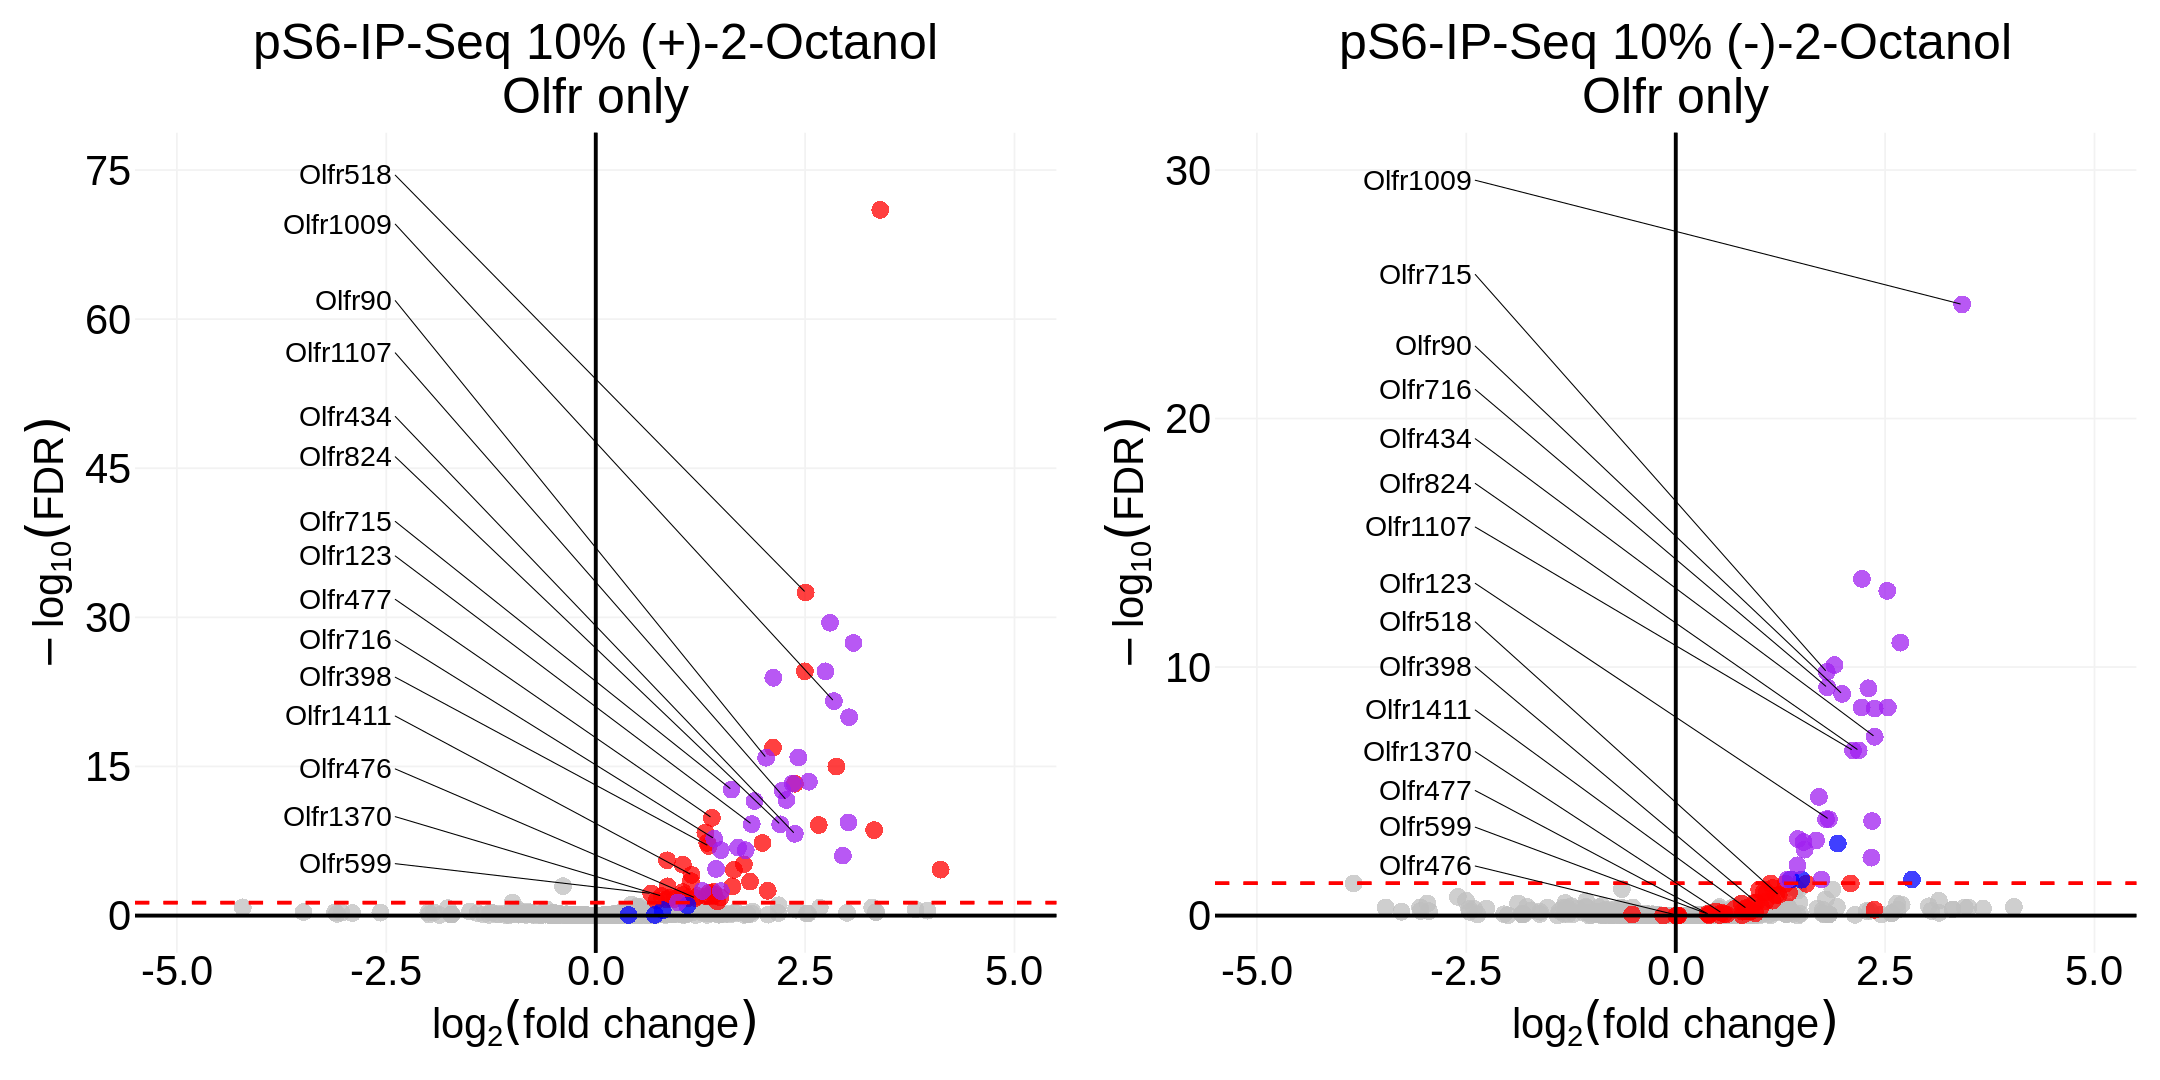

In [24]:
pocta_vp <- ggplot(data = subset(pocta_vivo, response == "none"), aes(x = logFC, y = -log10(FDR))) +
    geom_point(size = 5, stroke = 0, alpha = 0.75, color = "gray75") + 
    geom_vline(xintercept = 0, size = 1) +
    geom_hline(yintercept = 0, size = 1) +
    geom_hline(yintercept = -log10(0.05), color = "red", linetype = "dashed", size = 1) +
    geom_point(data = subset(pocta_vivo, response == "p2Octanol"), size = 5, stroke = 0, alpha = 0.75, color = "red") + 
    geom_point(data = subset(pocta_vivo, response == "n2Octanol"), size = 5, stroke = 0, alpha = 0.75, color = "blue") + 
    geom_point(data = subset(pocta_vivo, response == "both"), size = 5, stroke = 0, alpha = 0.75, color = "purple") + 
    scale_x_continuous(breaks = seq(-5,5,2.5), limits = c(-5,5)) +
    scale_y_continuous(breaks = seq(0,75,15), limits = c(0,75)) +
    geom_vline(xintercept = 0, size = 1) +
    geom_hline(yintercept = 0, size = 1) +
    geom_hline(yintercept = -log10(0.05), color = "red", linetype = "dashed", size = 1) +
    ggtitle("pS6-IP-Seq 10% (+)-2-Octanol\nOlfr only") +
    xlab(expression(log[2](fold~change))) +
    ylab(expression(-log[10](FDR))) +
    geom_text_repel(data = subset(pocta_vivo, symbol == "Olfr716"), label = subset(pocta_vivo, symbol == "Olfr716")$symbol,
              nudge_x = -2.5-(subset(pocta_vivo, symbol == "Olfr716")$logFC),
              nudge_y = 20, size = 6, aes(segment.size = .3), hjust = 1) +
    geom_text_repel(data = subset(pocta_vivo, symbol == "Olfr599"), label = subset(pocta_vivo, symbol == "Olfr599")$symbol,
              nudge_x = -2.5-(subset(pocta_vivo, symbol == "Olfr599")$logFC),
              nudge_y = 3, size = 6, aes(segment.size = .3), hjust = 1) +
    geom_text_repel(data = subset(pocta_vivo, symbol == "Olfr824"), label = subset(pocta_vivo, symbol == "Olfr824")$symbol,
              nudge_x = -2.5-(subset(pocta_vivo, symbol == "Olfr824")$logFC),
              nudge_y = 37, size = 6, aes(segment.size = .3), hjust = 1) +
    geom_text_repel(data = subset(pocta_vivo, symbol == "Olfr90"), label = subset(pocta_vivo, symbol == "Olfr90")$symbol,
              nudge_x = -2.5-(subset(pocta_vivo, symbol == "Olfr90")$logFC),
              nudge_y = 46, size = 6, aes(segment.size = .3), hjust = 1) +
    geom_text_repel(data = subset(pocta_vivo, symbol == "Olfr434"), label = subset(pocta_vivo, symbol == "Olfr434")$symbol,
              nudge_x = -2.5-(subset(pocta_vivo, symbol == "Olfr434")$logFC),
              nudge_y = 42, size = 6, aes(segment.size = .3), hjust = 1) +
    geom_text_repel(data = subset(pocta_vivo, symbol == "Olfr1411"), label = subset(pocta_vivo, symbol == "Olfr1411")$symbol,
              nudge_x = -2.5-(subset(pocta_vivo, symbol == "Olfr1411")$logFC),
              nudge_y = 16, size = 6, aes(segment.size = .3), hjust = 1) +
    geom_text_repel(data = subset(pocta_vivo, symbol == "Olfr398"), label = subset(pocta_vivo, symbol == "Olfr398")$symbol,
              nudge_x = -2.5-(subset(pocta_vivo, symbol == "Olfr398")$logFC),
              nudge_y = 17, size = 6, aes(segment.size = .3), hjust = 1) +
    geom_text_repel(data = subset(pocta_vivo, symbol == "Olfr476"), label = subset(pocta_vivo, symbol == "Olfr476")$symbol,
              nudge_x = -2.5-(subset(pocta_vivo, symbol == "Olfr476")$logFC),
              nudge_y = 13, size = 6, aes(segment.size = .3), hjust = 1) +
    geom_text_repel(data = subset(pocta_vivo, symbol == "Olfr1107"), label = subset(pocta_vivo, symbol == "Olfr1107")$symbol,
              nudge_x = -2.5-(subset(pocta_vivo, symbol == "Olfr1107")$logFC),
              nudge_y = 45, size = 6, aes(segment.size = .3), hjust = 1) +
    geom_text_repel(data = subset(pocta_vivo, symbol == "Olfr1370"), label = subset(pocta_vivo, symbol == "Olfr1370")$symbol,
              nudge_x = -2.5-(subset(pocta_vivo, symbol == "Olfr1370")$logFC),
              nudge_y = 8, size = 6, aes(segment.size = .3), hjust = 1) +
    geom_text_repel(data = subset(pocta_vivo, symbol == "Olfr477"), label = subset(pocta_vivo, symbol == "Olfr477")$symbol,
              nudge_x = -2.5-(subset(pocta_vivo, symbol == "Olfr477")$logFC),
              nudge_y = 22, size = 6, aes(segment.size = .3), hjust = 1) +
    geom_text_repel(data = subset(pocta_vivo, symbol == "Olfr123"), label = subset(pocta_vivo, symbol == "Olfr123")$symbol,
              nudge_x = -2.5-(subset(pocta_vivo, symbol == "Olfr123")$logFC),
              nudge_y = 27, size = 6, aes(segment.size = .3), hjust = 1) +
    geom_text_repel(data = subset(pocta_vivo, symbol == "Olfr1009"), label = subset(pocta_vivo, symbol == "Olfr1009")$symbol,
              nudge_x = -2.5-(subset(pocta_vivo, symbol == "Olfr1009")$logFC),
              nudge_y = 48, size = 6, aes(segment.size = .3), hjust = 1) +
    geom_text_repel(data = subset(pocta_vivo, symbol == "Olfr518"), label = subset(pocta_vivo, symbol == "Olfr518")$symbol,
              nudge_x = -2.5-(subset(pocta_vivo, symbol == "Olfr518")$logFC),
              nudge_y = 42, size = 6, aes(segment.size = .3), hjust = 1) +
    geom_text_repel(data = subset(pocta_vivo, symbol == "Olfr715"), label = subset(pocta_vivo, symbol == "Olfr715")$symbol,
              nudge_x = -2.5-(subset(pocta_vivo, symbol == "Olfr715")$logFC),
              nudge_y = 27, size = 6, aes(segment.size = .3), hjust = 1) +
    theme(legend.position = "none",
          plot.title = element_text(size = 30, hjust = 0.5, color = "black"),
          plot.background = element_blank(),
          panel.border = element_blank(),
          panel.grid.major = element_line(color="gray95"),
          panel.grid.minor = element_blank(),
          panel.background = element_blank(),
          axis.line.x = element_blank(),
          axis.line.y = element_blank(),
          axis.text.x = element_text(color = "black", size = 25),
          axis.text.y = element_text(color = "black", size = 25),
          axis.title.x = element_text(color = "black", size = 25),
          axis.title.y = element_text(color = "black", size = 25),
          axis.ticks.length.x = unit(0, "cm"),
          axis.ticks.length.y = unit(0, "cm"),
          plot.margin = margin(t=0.5,r=0.5,b=0.5,l=0.5, "cm"))

nocta_vp <- ggplot(data = subset(nocta_vivo, response == "none"), aes(x = logFC, y = -log10(FDR))) +
    geom_point(size = 5, stroke = 0, alpha = 0.75, color = "gray75") + 
    geom_vline(xintercept = 0, size = 1) +
    geom_hline(yintercept = 0, size = 1) +
    geom_hline(yintercept = -log10(0.05), color = "red", linetype = "dashed", size = 1) +
    geom_point(data = subset(nocta_vivo, response == "p2Octanol"), size = 5, stroke = 0, alpha = 0.75, color = "red") + 
    geom_point(data = subset(nocta_vivo, response == "n2Octanol"), size = 5, stroke = 0, alpha = 0.75, color = "blue") + 
    geom_point(data = subset(nocta_vivo, response == "both"), size = 5, stroke = 0, alpha = 0.75, color = "purple") + 
    scale_x_continuous(breaks = seq(-5,5,2.5), limits = c(-5,5)) +
    scale_y_continuous(breaks = seq(0,30,10), limits = c(0,30)) +
    geom_vline(xintercept = 0, size = 1) +
    geom_hline(yintercept = 0, size = 1) +
    geom_hline(yintercept = -log10(0.05), color = "red", linetype = "dashed", size = 1) +
    ggtitle("pS6-IP-Seq 10% (-)-2-Octanol\nOlfr only") +
    xlab(expression(log[2](fold~change))) +
    ylab(expression(-log[10](FDR))) +
    geom_text_repel(data = subset(nocta_vivo, symbol == "Olfr716"), label = subset(nocta_vivo, symbol == "Olfr716")$symbol,
              nudge_x = -2.5-(subset(nocta_vivo, symbol == "Olfr716")$logFC),
              nudge_y = 12, size = 6, aes(segment.size = .3), hjust = 1) +
    geom_text_repel(data = subset(nocta_vivo, symbol == "Olfr599"), label = subset(nocta_vivo, symbol == "Olfr599")$symbol,
              nudge_x = -2.5-(subset(nocta_vivo, symbol == "Olfr599")$logFC),
              nudge_y = 3.5, size = 6, aes(segment.size = .3), hjust = 1) +
    geom_text_repel(data = subset(nocta_vivo, symbol == "Olfr824"), label = subset(nocta_vivo, symbol == "Olfr824")$symbol,
              nudge_x = -2.5-(subset(nocta_vivo, symbol == "Olfr824")$logFC),
              nudge_y = 10.75, size = 6, aes(segment.size = .3), hjust = 1) +
    geom_text_repel(data = subset(nocta_vivo, symbol == "Olfr90"), label = subset(nocta_vivo, symbol == "Olfr90")$symbol,
              nudge_x = -2.5-(subset(nocta_vivo, symbol == "Olfr90")$logFC),
              nudge_y = 14, size = 6, aes(segment.size = .3), hjust = 1) +
    geom_text_repel(data = subset(nocta_vivo, symbol == "Olfr434"), label = subset(nocta_vivo, symbol == "Olfr434")$symbol,
              nudge_x = -2.5-(subset(nocta_vivo, symbol == "Olfr434")$logFC),
              nudge_y = 12, size = 6, aes(segment.size = .3), hjust = 1) +
    geom_text_repel(data = subset(nocta_vivo, symbol == "Olfr1411"), label = subset(nocta_vivo, symbol == "Olfr1411")$symbol,
              nudge_x = -2.5-(subset(nocta_vivo, symbol == "Olfr1411")$logFC),
              nudge_y = 8, size = 6, aes(segment.size = .3), hjust = 1) +
    geom_text_repel(data = subset(nocta_vivo, symbol == "Olfr398"), label = subset(nocta_vivo, symbol == "Olfr398")$symbol,
              nudge_x = -2.5-(subset(nocta_vivo, symbol == "Olfr398")$logFC),
              nudge_y = 9.5, size = 6, aes(segment.size = .3), hjust = 1) +
    geom_text_repel(data = subset(nocta_vivo, symbol == "Olfr476"), label = subset(nocta_vivo, symbol == "Olfr476")$symbol,
              nudge_x = -2.5-(subset(nocta_vivo, symbol == "Olfr476")$logFC),
              nudge_y = 2, size = 6, aes(segment.size = .3), hjust = 1) +
    geom_text_repel(data = subset(nocta_vivo, symbol == "Olfr1107"), label = subset(nocta_vivo, symbol == "Olfr1107")$symbol,
              nudge_x = -2.5-(subset(nocta_vivo, symbol == "Olfr1107")$logFC),
              nudge_y = 9, size = 6, aes(segment.size = .3), hjust = 1) +
    geom_text_repel(data = subset(nocta_vivo, symbol == "Olfr1370"), label = subset(nocta_vivo, symbol == "Olfr1370")$symbol,
              nudge_x = -2.5-(subset(nocta_vivo, symbol == "Olfr1370")$logFC),
              nudge_y = 6.5, size = 6, aes(segment.size = .3), hjust = 1) +
    geom_text_repel(data = subset(nocta_vivo, symbol == "Olfr477"), label = subset(nocta_vivo, symbol == "Olfr477")$symbol,
              nudge_x = -2.5-(subset(nocta_vivo, symbol == "Olfr477")$logFC),
              nudge_y = 5, size = 6, aes(segment.size = .3), hjust = 1) +
    geom_text_repel(data = subset(nocta_vivo, symbol == "Olfr123"), label = subset(nocta_vivo, symbol == "Olfr123")$symbol,
              nudge_x = -2.5-(subset(nocta_vivo, symbol == "Olfr123")$logFC),
              nudge_y = 9.5, size = 6, aes(segment.size = .3), hjust = 1) +
    geom_text_repel(data = subset(nocta_vivo, symbol == "Olfr1009"), label = subset(nocta_vivo, symbol == "Olfr1009")$symbol,
              nudge_x = -2.5-(subset(nocta_vivo, symbol == "Olfr1009")$logFC),
              nudge_y = 5, size = 6, aes(segment.size = .3), hjust = 1) +
    geom_text_repel(data = subset(nocta_vivo, symbol == "Olfr518"), label = subset(nocta_vivo, symbol == "Olfr518")$symbol,
              nudge_x = -2.5-(subset(nocta_vivo, symbol == "Olfr518")$logFC),
              nudge_y = 11, size = 6, aes(segment.size = .3), hjust = 1) +
    geom_text_repel(data = subset(nocta_vivo, symbol == "Olfr715"), label = subset(nocta_vivo, symbol == "Olfr715")$symbol,
              nudge_x = -2.5-(subset(nocta_vivo, symbol == "Olfr715")$logFC),
              nudge_y = 16, size = 6, aes(segment.size = .3), hjust = 1) +
    theme(legend.position = "none",
          plot.title = element_text(size = 30, hjust = 0.5, color = "black"),
          plot.background = element_blank(),
          panel.border = element_blank(),
          panel.grid.major = element_line(color="gray95"),
          panel.grid.minor = element_blank(),
          panel.background = element_blank(),
          axis.line.x = element_blank(),
          axis.line.y = element_blank(),
          axis.text.x = element_text(color = "black", size = 25),
          axis.text.y = element_text(color = "black", size = 25),
          axis.title.x = element_text(color = "black", size = 25),
          axis.title.y = element_text(color = "black", size = 25),
          axis.ticks.length.x = unit(0, "cm"),
          axis.ticks.length.y = unit(0, "cm"),
          plot.margin = margin(t=0.5,r=0.5,b=0.5,l=0.5, "cm"))

options(repr.plot.width=18, repr.plot.height=9)
octa_vp <- ggarrange(pocta_vp, nocta_vp, ncol = 2, nrow = 1)
octa_vp
#ggsave("./plots/fig_1_supp2e.pdf", octa_vp, height = 9, width = 18)

In [26]:
#pcarv_vivo_response <- pcarv_vivo %>%
#    subset(response != "none") %>%
#    dplyr::select(logFC, FDR, symbol, response) %>%
#    mutate(odor = "plus") %>%
#    arrange(symbol)
#
#ncarv_vivo_response <- ncarv_vivo %>%
#    subset(response != "none") %>%
#    dplyr::select(logFC, FDR, symbol, response) %>%
#    mutate(odor = "minus") %>%
#    arrange(symbol)
#
#pment_vivo_response <- pment_vivo %>%
#    subset(response != "none") %>%
#    dplyr::select(logFC, FDR, symbol, response) %>%
#    mutate(odor = "plus") %>%
#    arrange(symbol)
#
#nment_vivo_response <- nment_vivo %>%
#    subset(response != "none") %>%
#    dplyr::select(logFC, FDR, symbol, response) %>%
#    mutate(odor = "minus") %>%
#    arrange(symbol)
#
#pocta_vivo_response <- pocta_vivo %>%
#    subset(response != "none") %>%
#    dplyr::select(logFC, FDR, symbol, response) %>%
#    mutate(odor = "plus") %>%
#    arrange(symbol)
#
#nocta_vivo_response <- nocta_vivo %>%
#    subset(response != "none") %>%
#    dplyr::select(logFC, FDR, symbol, response) %>%
#    mutate(odor = "minus") %>%
#    arrange(symbol)
#
#write.csv(pcarv_vivo_response, "./luciferase_data/pcarv_vivo_response.csv")
#write.csv(ncarv_vivo_response, "./luciferase_data/ncarv_vivo_response.csv")
#write.csv(pment_vivo_response, "./luciferase_data/pment_vivo_response.csv")
#write.csv(nment_vivo_response, "./luciferase_data/nment_vivo_response.csv")
#write.csv(pocta_vivo_response, "./luciferase_data/pocta_vivo_response.csv")
#write.csv(nocta_vivo_response, "./luciferase_data/nocta_vivo_response.csv")
#
#write.csv(carv_vitro_res, "./luciferase_data/carv_vitro_res.csv")
#write.csv(ment_vitro_res, "./luciferase_data/ment_vitro_res.csv")
#write.csv(octa_vitro_res, "./luciferase_data/octa_vitro_res.csv")

In [3]:
carv_results <- read.delim("./luciferase_data/carv_results.csv", header=T, sep=',', row.names = 1)
ment_results <- read.delim("./luciferase_data/ment_results.csv", header=T, sep=',', row.names = 1)
octa_results <- read.delim("./luciferase_data/octa_results.csv", header=T, sep=',', row.names = 1)

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



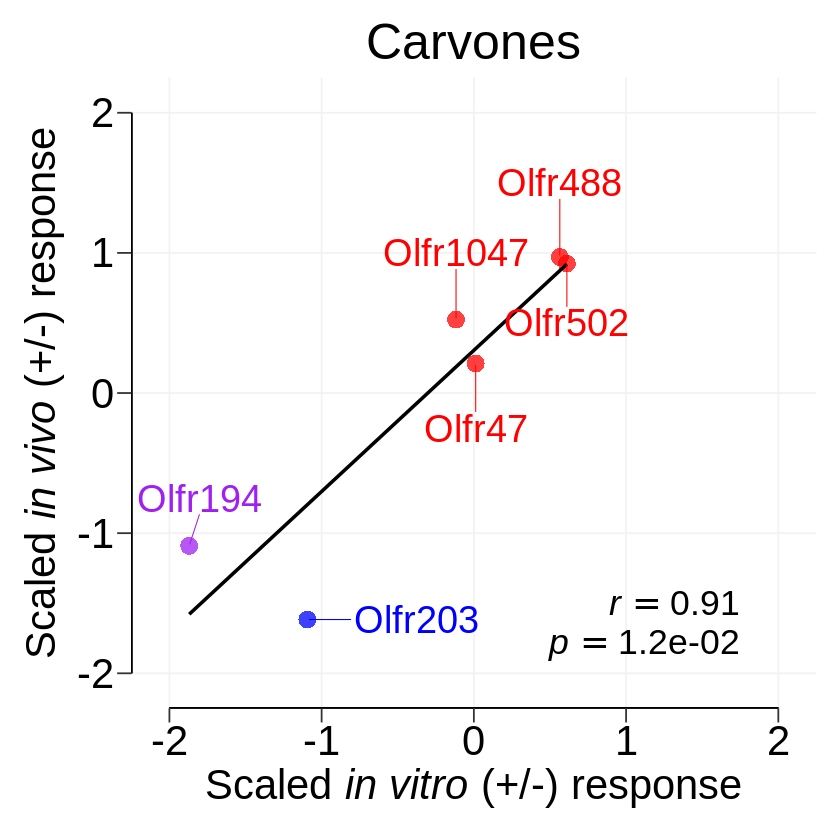

In [17]:
carv_cor <- cor(carv_results$vitro_ratio, carv_results$vivo_ratio)
carv_pval <- cor.test(~vitro_ratio + vivo_ratio, data = carv_results)

carv_vivo_vitro <- ggplot(data = carv_results, aes(x = vitro_ratio, y = vivo_ratio, color = vivo_pref, label = receptor)) +
    geom_point(size = 5, stroke = 0, alpha = 0.75) +
    ggtitle("Carvones") +
    xlab(expression("Scaled"~italic("in vitro")~"(+/-) response")) +
    ylab(expression("Scaled"~italic("in vivo")~"(+/-) response")) +
    scale_color_manual(values = c("nCarvone" = "blue", "pCarvone" = "red", "both" = "purple")) + 
    scale_x_continuous(breaks = seq(-2,2,1), limits = c(-2.25, 2.25), expand = c(0,0)) +
    scale_y_continuous(breaks = seq(-2,2,1), limits = c(-2.25, 2.25), expand = c(0,0)) +
    geom_segment(aes(x = -2, xend = 2, y = -2.25, yend = -2.25), color = "black") +
    geom_segment(aes(x = -2.25, xend = -2.25, y = -2, yend = 2), color = "black") +
    geom_smooth(method=lm, color = "black", se=F) +
    geom_text_repel(data = subset(carv_results, receptor == "Olfr488"),
                    label =  subset(carv_results, receptor == "Olfr488")$receptor,
                    nudge_y = 1.5 - subset(carv_results, receptor == "Olfr488")$vivo_ratio,
                    size = 8, aes(segment.size = .3), hjust = 0.5) +
    geom_text_repel(data = subset(carv_results, receptor == "Olfr502"),
                    label =  subset(carv_results, receptor == "Olfr502")$receptor,
                    nudge_y = 0.5 - subset(carv_results, receptor == "Olfr502")$vivo_ratio,
                    size = 8, aes(segment.size = .3), hjust = 0.5) +
    geom_text_repel(data = subset(carv_results, receptor == "Olfr1047"),
                    label =  subset(carv_results, receptor == "Olfr1047")$receptor,
                    nudge_y = 1 - subset(carv_results, receptor == "Olfr1047")$vivo_ratio,
                    size = 8, aes(segment.size = .3), hjust = 0.5) +
    geom_text_repel(data = subset(carv_results, receptor == "Olfr47"),
                    label =  subset(carv_results, receptor == "Olfr47")$receptor,
                    nudge_y = -0.25 - subset(carv_results, receptor == "Olfr47")$vivo_ratio,
                    size = 8, aes(segment.size = .3), hjust = 0.5) +
    geom_text_repel(data = subset(carv_results, receptor == "Olfr203"),
                    label =  subset(carv_results, receptor == "Olfr203")$receptor,
                    nudge_x = -0.75 - subset(carv_results, receptor == "Olfr203")$vitro_ratio,
                    size = 8, aes(segment.size = .3), hjust = 0) +
    geom_text_repel(data = subset(carv_results, receptor == "Olfr194"),
                    label =  subset(carv_results, receptor == "Olfr194")$receptor,
                    nudge_y = -0.75 - subset(carv_results, receptor == "Olfr194")$vivo_ratio,
                    size = 8, aes(segment.size = .3), hjust = 0.5) +
    theme(legend.position = "none",
          plot.title = element_text(size = 30, hjust = 0.5, color = "black"),
          plot.background = element_blank(),
          panel.border = element_blank(),
          panel.grid.major = element_line(color="gray95"),
          panel.grid.minor = element_blank(),
          panel.background = element_blank(),
          axis.line.x = element_blank(),
          axis.line.y = element_blank(),
          axis.text.x = element_text(color = "black", size = 25),
          axis.text.y = element_text(color = "black", size = 25),
          axis.title.x = element_text(color = "black", size = 25),
          axis.title.y = element_text(color = "black", size = 25),
          axis.ticks.length.x = unit(.3, "cm"),
          axis.ticks.length.y = unit(.3, "cm"),
          plot.margin = margin(t=0.5,r=0.5,b=0.5,l=0.5, "cm")) +
    annotate("text", x = 1.75, y = -1.5, label = paste("italic(r) ==", round(carv_cor, 2)), parse=T, size = 7.5, hjust = 1) +
    annotate("text", x = 1.75, y = -1.8, label = paste("italic(p) ==", signif(carv_pval$p.value, digits = 2)), parse=TRUE, size = 7.5, hjust = 1)

options(repr.plot.width=7, repr.plot.height=7)
options(scipen=-3)
carv_vivo_vitro
#ggsave("./plots/fig_1c_1.pdf", carv_vivo_vitro, height = 7, width = 7)

`geom_smooth()` using formula 'y ~ x'



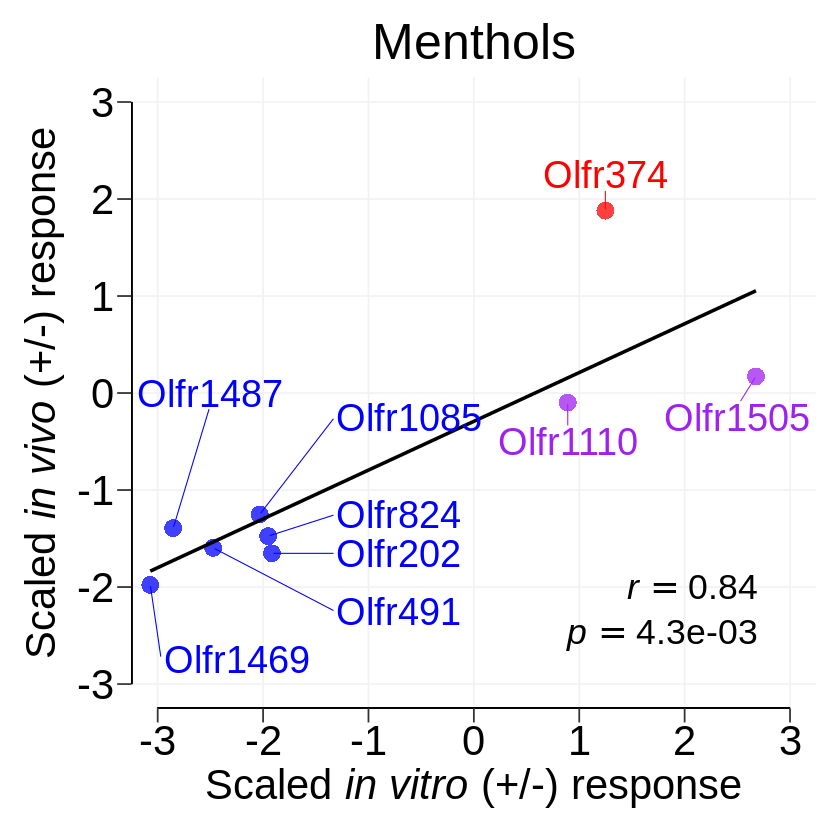

In [19]:
ment_cor <- cor(ment_results$vitro_ratio, ment_results$vivo_ratio)
ment_pval <- cor.test(~vitro_ratio + vivo_ratio, data = ment_results)

ment_vivo_vitro <- ggplot(data = ment_results, aes(x = vitro_ratio, y = vivo_ratio, color = vivo_pref, label = receptor)) +
    geom_point(size = 5, stroke = 0, alpha = 0.75) +
    ggtitle("Menthols") +
    xlab(expression("Scaled"~italic("in vitro")~"(+/-) response")) +
    ylab(expression("Scaled"~italic("in vivo")~"(+/-) response")) +
    scale_color_manual(values = c("nMenthol" = "blue", "pMenthol" = "red", "both" = "purple")) + 
    scale_x_continuous(breaks = seq(-3,3,1), limits = c(-3.25, 3.25), expand = c(0,0)) +
    scale_y_continuous(breaks = seq(-3,3,1), limits = c(-3.25, 3.25), expand = c(0,0)) +
    geom_segment(aes(x = -3, xend = 3, y = -3.25, yend = -3.25), color = "black") +
    geom_segment(aes(x = -3.25, xend = -3.25, y = -3, yend = 3), color = "black") +
    geom_smooth(method=lm, color = "black", se=F) +
    geom_text_repel(data = subset(ment_results, receptor == "Olfr374"),
                    label =  subset(ment_results, receptor == "Olfr374")$receptor,
                    nudge_y = 2.25 - subset(ment_results, receptor == "Olfr374")$vivo_ratio,
                    size = 8, aes(segment.size = .3), hjust = 0.5) +
    geom_text_repel(data = subset(ment_results, receptor == "Olfr1505"),
                    label =  subset(ment_results, receptor == "Olfr1505")$receptor,
                    nudge_y = -.25 - subset(ment_results, receptor == "Olfr1505")$vivo_ratio,
                    size = 8, aes(segment.size = .3), hjust = 0.5) +
    geom_text_repel(data = subset(ment_results, receptor == "Olfr1110"),
                    label =  subset(ment_results, receptor == "Olfr1110")$receptor,
                    nudge_y = -.5 - subset(ment_results, receptor == "Olfr1110")$vivo_ratio,
                    size = 8, aes(segment.size = .3), hjust = 0.5) +
    geom_text_repel(data = subset(ment_results, receptor == "Olfr202"),
                    label =  subset(ment_results, receptor == "Olfr202")$receptor,
                    nudge_x = -1.25 - subset(ment_results, receptor == "Olfr202")$vitro_ratio,
                    size = 8, aes(segment.size = .3), hjust = 0) +
    geom_text_repel(data = subset(ment_results, receptor == "Olfr824"),
                    label =  subset(ment_results, receptor == "Olfr824")$receptor,
                    nudge_x = -1.25 - subset(ment_results, receptor == "Olfr824")$vitro_ratio,
                    nudge_y = -1.25 - subset(ment_results, receptor == "Olfr824")$vivo_ratio,
                    size = 8, aes(segment.size = .3), hjust = 0) +
    geom_text_repel(data = subset(ment_results, receptor == "Olfr1085"),
                    label =  subset(ment_results, receptor == "Olfr1085")$receptor,
                    nudge_x = -1.25 - subset(ment_results, receptor == "Olfr1085")$vitro_ratio,
                    nudge_y = -.25 - subset(ment_results, receptor == "Olfr1085")$vivo_ratio,
                    size = 8, aes(segment.size = .3), hjust = 0) +
    geom_text_repel(data = subset(ment_results, receptor == "Olfr491"),
                    label =  subset(ment_results, receptor == "Olfr491")$receptor,
                    nudge_x = -1.25 - subset(ment_results, receptor == "Olfr491")$vitro_ratio,
                    nudge_y = -2.25 - subset(ment_results, receptor == "Olfr491")$vivo_ratio,
                    size = 8, aes(segment.size = .3), hjust = 0) +
    geom_text_repel(data = subset(ment_results, receptor == "Olfr1487"),
                    label =  subset(ment_results, receptor == "Olfr1487")$receptor,
                    nudge_x = -2.5 - subset(ment_results, receptor == "Olfr1487")$vitro_ratio,
                    nudge_y = 0 - subset(ment_results, receptor == "Olfr1487")$vivo_ratio,
                    size = 8, aes(segment.size = .3), hjust = 0.5) +
    geom_text_repel(data = subset(ment_results, receptor == "Olfr1469"),
                    label =  subset(ment_results, receptor == "Olfr1469")$receptor,
                    nudge_x = -2.25 - subset(ment_results, receptor == "Olfr1469")$vitro_ratio,
                    nudge_y = -2.75 - subset(ment_results, receptor == "Olfr1469")$vivo_ratio,
                    size = 8, aes(segment.size = .3), hjust = 0.5) +
    theme(legend.position = "none",
          plot.title = element_text(size = 30, hjust = 0.5, color = "black"),
          plot.background = element_blank(),
          panel.border = element_blank(),
          panel.grid.major = element_line(color="gray95"),
          panel.grid.minor = element_blank(),
          panel.background = element_blank(),
          axis.line.x = element_blank(),
          axis.line.y = element_blank(),
          axis.text.x = element_text(color = "black", size = 25),
          axis.text.y = element_text(color = "black", size = 25),
          axis.title.x = element_text(color = "black", size = 25),
          axis.title.y = element_text(color = "black", size = 25),
          axis.ticks.length.x = unit(.3, "cm"),
          axis.ticks.length.y = unit(.3, "cm"),
          plot.margin = margin(t=0.5,r=0.5,b=0.5,l=0.5, "cm")) +
    annotate("text", x = 2.7, y = -2, label = paste("italic(r) ==", round(ment_cor, 2)), parse=T, size = 7.5, hjust = 1) +
    annotate("text", x = 2.7, y = -2.5, label = paste("italic(p) ==", signif(ment_pval$p.value, digits = 2)), parse=TRUE, size = 7.5, hjust = 1)

options(repr.plot.width=7, repr.plot.height=7)
options(scipen=-2)
ment_vivo_vitro
#ggsave("./plots/fig_1c_2.pdf", ment_vivo_vitro, height = 7, width = 7)

`geom_smooth()` using formula 'y ~ x'



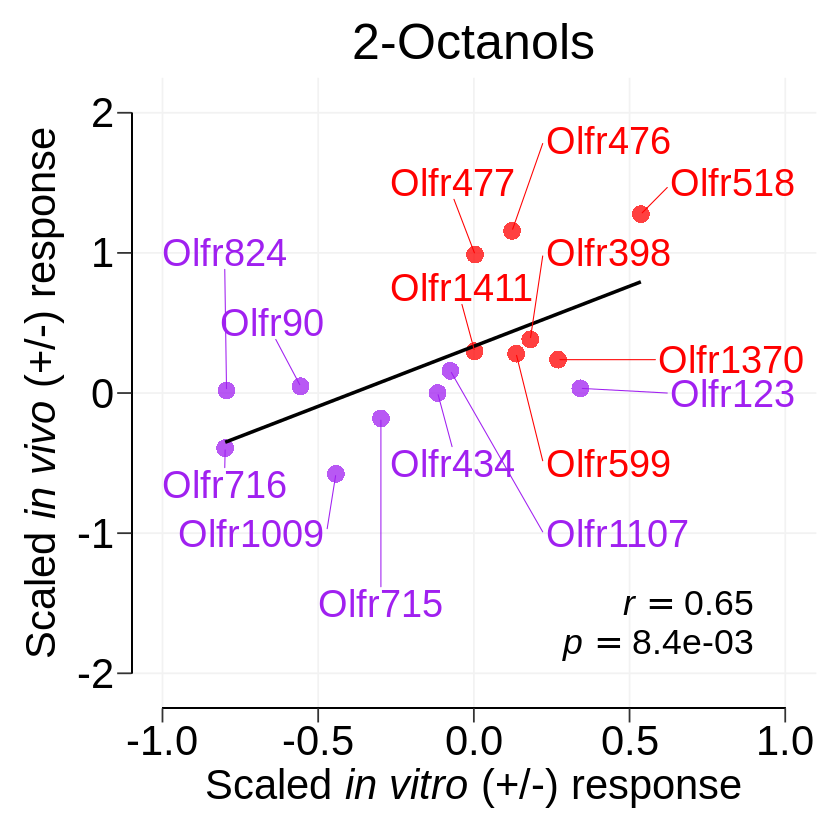

In [21]:
octa_cor <- cor(octa_results$vitro_ratio, octa_results$vivo_ratio)
octa_pval <- cor.test(~vitro_ratio + vivo_ratio, data = octa_results)

octa_vivo_vitro <- ggplot(data = octa_results, aes(x = vitro_ratio, y = vivo_ratio, color = vivo_pref, label = receptor)) +
    geom_point(size = 5, stroke = 0, alpha = 0.75) +
    ggtitle("2-Octanols") +
    xlab(expression("Scaled"~italic("in vitro")~"(+/-) response")) +
    ylab(expression("Scaled"~italic("in vivo")~"(+/-) response")) +
    scale_color_manual(values = c("n2Octanol" = "blue", "p2Octanol" = "red", "both" = "purple")) + 
    scale_x_continuous(breaks = seq(-1,1,0.5), limits = c(-1.1,1.1), expand = c(0,0)) +
    scale_y_continuous(breaks = seq(-2,2,1), limits = c(-2.25,2.25), expand = c(0,0)) +
    geom_segment(aes(x = -1, xend = 1, y = -2.25, yend = -2.25), color = "black") +
    geom_segment(aes(x = -1.1, xend = -1.1, y = -2, yend = 2), color = "black") +
    geom_smooth(method=lm, color = "black", se=F) +
    geom_text_repel(data = subset(octa_results, receptor == "Olfr518"),
                    label =  subset(octa_results, receptor == "Olfr518")$receptor,
                    nudge_x = 0.65 - subset(octa_results, receptor == "Olfr518")$vitro_ratio,
                    nudge_y = 1.5 - subset(octa_results, receptor == "Olfr518")$vivo_ratio,
                    size = 8, aes(segment.size = .3), hjust = 0) +
    geom_text_repel(data = subset(octa_results, receptor == "Olfr1370"),
                    label =  subset(octa_results, receptor == "Olfr1370")$receptor,
                    nudge_x = 0.65 - subset(octa_results, receptor == "Olfr1370")$vitro_ratio,
                    size = 8, aes(segment.size = .3), hjust = 0) +
    geom_text_repel(data = subset(octa_results, receptor == "Olfr123"),
                    label =  subset(octa_results, receptor == "Olfr123")$receptor,
                    nudge_x = 0.65 - subset(octa_results, receptor == "Olfr123")$vitro_ratio,
                    nudge_y = 0 - subset(octa_results, receptor == "Olfr123")$vivo_ratio,
                    size = 8, aes(segment.size = .3), hjust = 0) +
    geom_text_repel(data = subset(octa_results, receptor == "Olfr398"),
                    label =  subset(octa_results, receptor == "Olfr398")$receptor,
                    nudge_x = 0.25 - subset(octa_results, receptor == "Olfr398")$vitro_ratio,
                    nudge_y = 1 - subset(octa_results, receptor == "Olfr398")$vivo_ratio,
                    size = 8, aes(segment.size = .3), hjust = 0) +
    geom_text_repel(data = subset(octa_results, receptor == "Olfr599"),
                    label =  subset(octa_results, receptor == "Olfr599")$receptor,
                    nudge_x = 0.25 - subset(octa_results, receptor == "Olfr599")$vitro_ratio,
                    nudge_y = -0.5 - subset(octa_results, receptor == "Olfr599")$vivo_ratio,
                    size = 8, aes(segment.size = .3), hjust = 0) +
    geom_text_repel(data = subset(octa_results, receptor == "Olfr476"),
                    label =  subset(octa_results, receptor == "Olfr476")$receptor,
                    nudge_x = 0.25 - subset(octa_results, receptor == "Olfr476")$vitro_ratio,
                    nudge_y = 1.8 - subset(octa_results, receptor == "Olfr476")$vivo_ratio,
                    size = 8, aes(segment.size = .3), hjust = 0) +
    geom_text_repel(data = subset(octa_results, receptor == "Olfr477"),
                    label =  subset(octa_results, receptor == "Olfr477")$receptor,
                    nudge_x = -0.25 - subset(octa_results, receptor == "Olfr477")$vitro_ratio,
                    nudge_y = 1.5 - subset(octa_results, receptor == "Olfr477")$vivo_ratio,
                    size = 8, aes(segment.size = .3), hjust = 0) +
    geom_text_repel(data = subset(octa_results, receptor == "Olfr1411"),
                    label =  subset(octa_results, receptor == "Olfr1411")$receptor,
                    nudge_x = -0.25 - subset(octa_results, receptor == "Olfr1411")$vitro_ratio,
                    nudge_y = .75 - subset(octa_results, receptor == "Olfr1411")$vivo_ratio,
                    size = 8, aes(segment.size = .3), hjust = 0) +
    geom_text_repel(data = subset(octa_results, receptor == "Olfr1107"),
                    label =  subset(octa_results, receptor == "Olfr1107")$receptor,
                    nudge_x = 0.25 - subset(octa_results, receptor == "Olfr1107")$vitro_ratio,
                    nudge_y = -1 - subset(octa_results, receptor == "Olfr1107")$vivo_ratio,
                    size = 8, aes(segment.size = .3), hjust = 0) +
    geom_text_repel(data = subset(octa_results, receptor == "Olfr434"),
                    label =  subset(octa_results, receptor == "Olfr434")$receptor,
                    nudge_x = -0.25 - subset(octa_results, receptor == "Olfr434")$vitro_ratio,
                    nudge_y = -.5 - subset(octa_results, receptor == "Olfr434")$vivo_ratio,
                    size = 8, aes(segment.size = .3), hjust = 0) +
    geom_text_repel(data = subset(octa_results, receptor == "Olfr715"),
                    label =  subset(octa_results, receptor == "Olfr715")$receptor,
                    nudge_y = -1.5 - subset(octa_results, receptor == "Olfr715")$vivo_ratio,
                    size = 8, aes(segment.size = .3), hjust = 0.5) +
    geom_text_repel(data = subset(octa_results, receptor == "Olfr1009"),
                    label =  subset(octa_results, receptor == "Olfr1009")$receptor,
                    nudge_y = -1 - subset(octa_results, receptor == "Olfr1009")$vivo_ratio,
                    nudge_x = -.5 - subset(octa_results, receptor == "Olfr1009")$vitro_ratio,
                    size = 8, aes(segment.size = .3), hjust = 1) +
    geom_text_repel(data = subset(octa_results, receptor == "Olfr716"),
                    label =  subset(octa_results, receptor == "Olfr716")$receptor,
                    nudge_y = -0.65 - subset(octa_results, receptor == "Olfr716")$vivo_ratio,
                    nudge_x = -0.8 - subset(octa_results, receptor == "Olfr716")$vitro_ratio,
                    size = 8, aes(segment.size = .3), hjust = 0.5) +
    geom_text_repel(data = subset(octa_results, receptor == "Olfr824"),
                    label =  subset(octa_results, receptor == "Olfr824")$receptor,
                    nudge_y = 1 - subset(octa_results, receptor == "Olfr824")$vivo_ratio,
                    nudge_x = -0.8 - subset(octa_results, receptor == "Olfr824")$vitro_ratio,
                    size = 8, aes(segment.size = .3), hjust = 0.5) +
    geom_text_repel(data = subset(octa_results, receptor == "Olfr90"),
                    label =  subset(octa_results, receptor == "Olfr90")$receptor,
                    nudge_y = 0.5 - subset(octa_results, receptor == "Olfr90")$vivo_ratio,
                    nudge_x = -0.5 - subset(octa_results, receptor == "Olfr90")$vitro_ratio,
                    size = 8, aes(segment.size = .3), hjust = 1) +
    theme(legend.position = "none",
          plot.title = element_text(size = 30, hjust = 0.5, color = "black"),
          plot.background = element_blank(),
          panel.border = element_blank(),
          panel.grid.major = element_line(color="gray95"),
          panel.grid.minor = element_blank(),
          panel.background = element_blank(),
          axis.line.x = element_blank(),
          axis.line.y = element_blank(),
          axis.text.x = element_text(color = "black", size = 25),
          axis.text.y = element_text(color = "black", size = 25),
          axis.title.x = element_text(color = "black", size = 25),
          axis.title.y = element_text(color = "black", size = 25),
          axis.ticks.length.x = unit(.3, "cm"),
          axis.ticks.length.y = unit(.3, "cm"),
          plot.margin = margin(t=0.5,r=0.5,b=0.5,l=0.5, "cm")) +
    annotate("text", x = 0.9, y = -1.5, label = paste("italic(r) ==", round(octa_cor, 2)), parse=T, size = 7.5, hjust = 1) +
    annotate("text", x = 0.9, y = -1.8, label = paste("italic(p) ==", signif(octa_pval$p.value, digits = 2)), parse=TRUE, size = 7.5, hjust = 1)

options(repr.plot.width=7, repr.plot.height=7)
options(scipen=-2)
octa_vivo_vitro
#ggsave("./plots/fig_1c_3.pdf", octa_vivo_vitro, height = 7, width = 7)